In [2]:
%reset

import numpy as np
import pickle as pk

from astropy importy
units
from astropy import constants
# import matplotlib
from astropy.io import fits

import dill
# %pylab inline
import sys, os
# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')


Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

import matplotlib
import matplotlib.pyplot as pl
font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')

# %matplotlib inline



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
# DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_M8_17_nM64_nz256_imead1.pk','rb'))  
# DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty.pk','rb'))  
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_kk_gty_plancky3_beamed_B12_testIA_new.pk','rb'))  




In [12]:

df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')
ntheta = len(df['Yshear_y3'][str(0)]['theta'])
bins_array = [1,2,3,4]
nbins = len([*df['Yshear_y3'].keys()])

Cl_shearshear = np.zeros(ntheta*nbins)
Cl_sheary = np.zeros(ntheta*nbins)

cov_shearshear = np.zeros((ntheta*nbins,ntheta*nbins))
cov_sheary = np.zeros((ntheta*nbins,ntheta*nbins))



In [13]:
# df['shearshear_y3'][str(0)]['theta'] * 180./np.pi

df['shearshear_y3']['0_0']['err_p']




array([1.28406070e-05, 8.86547579e-06, 7.32510035e-06, 5.72609565e-06,
       4.78027522e-06, 3.51112356e-06, 2.92332928e-06, 2.56248411e-06,
       1.93203131e-06, 1.38470276e-06, 1.19419585e-06, 9.68116494e-07,
       7.32934348e-07, 5.51864460e-07, 4.79645560e-07, 3.74238455e-07,
       2.90704875e-07, 2.53733669e-07, 1.80231286e-07, 1.48921683e-07])

In [14]:
csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_real_halofit_v0.4_wmead.fits')   
# csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_fourier_halofit_v0.4_wmead.fits')   
bin1_gt = csf['gammat'].data['BIN1']
bin2_gt = csf['gammat'].data['BIN2']
gt_csf = csf['gammat'].data['VALUE']
gt_ang = csf['gammat'].data['ANG']


bin1_wt = csf['wtheta'].data['BIN1']
bin2_wt = csf['wtheta'].data['BIN2']
wt_csf = csf['wtheta'].data['VALUE']
wt_ang = csf['wtheta'].data['ANG']


bin1_xip = csf['xip'].data['BIN1']
bin2_xip = csf['xip'].data['BIN2']
xip_csf = csf['xip'].data['VALUE']
xip_ang = csf['xip'].data['ANG']







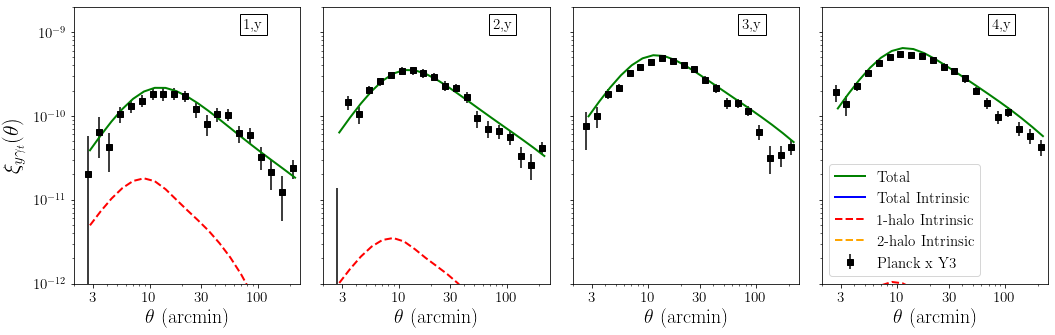

In [15]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
theta_array = DV.xi_result_dict['gty']['theta']
for j2 in range(4):
    bin_str = 'bin_' + str(j2+1) + '_' + str(0)


#     Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
#     Cl_j1_tot2 = DV.xi_result_dict['gty'][bin_str]['tot2']

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle=':', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot2, linestyle='-', marker='',lw = 2, color ='green',label='Total Mead2')  
    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='green',label='Total')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['gty'][bin_str]['int'], linestyle='-', marker='',lw = 2, color ='blue',label='Total Intrinsic')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['gty'][bin_str]['1hint'], linestyle='--', marker='',lw = 2, color ='red',label='1-halo Intrinsic')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['gty'][bin_str]['2hint'], linestyle='--', marker='',lw = 2, color ='orange',label='2-halo Intrinsic')  



    yk_g = df['Yshear_y3'][str(j2)]['xip']
    yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
    yk_err = df['Yshear_y3'][str(j2)]['err_p']
    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Planck x Y3')

#     yk_g = df['Yshear_y1'][str(j2)]['xip']
#     yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
#     yk_err = df['Yshear_y1'][str(j2)]['err_p']            
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
    ax[j2].set_ylim(1e-12,2e-9)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')






In [18]:
DV.xi_result_dict['kk'][bin_str]['2hint']


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

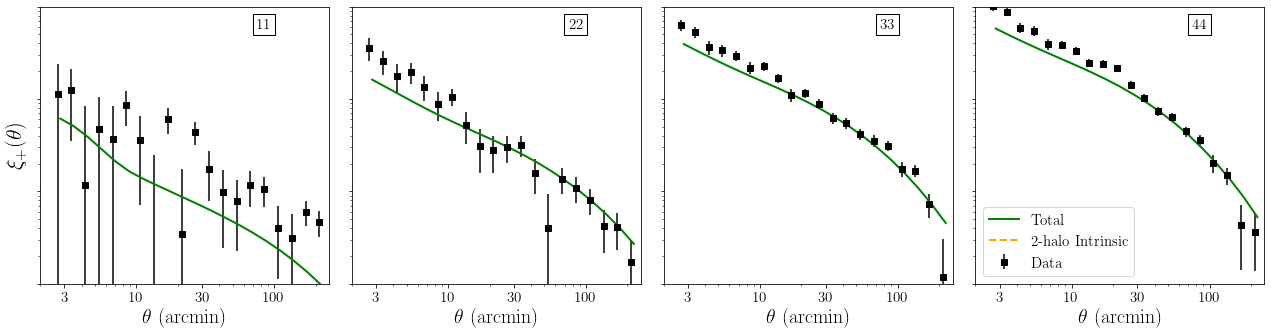

In [17]:
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
for j2 in range(4):
    bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
#     sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

#     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
#     Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, DV.xi_result_dict['kk'][bin_str]['int'], linestyle='-', marker='',lw = 2, color ='blue',label='Total Intrinsic')  
#     ax[j2].errorbar(theta_array, DV.xi_result_dict['kk'][bin_str]['1hint'], linestyle='--', marker='',lw = 2, color ='red',label='1-halo Intrinsic')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['kk'][bin_str]['2hint'], linestyle='--', marker='',lw = 2, color ='orange',label='2-halo Intrinsic')  



#     ax[j2].errorbar(xip_ang[sel_ind], xip_csf[sel_ind], linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



    yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
    yk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
    yk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err_p']
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Y3')
    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Data')
    

#     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
#     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
#     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
#     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
    ax[j2].set_ylim(1e-7,1e-4)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
    
    

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,str(j2+1) + str(j2+1), verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1
    ax[j2].set_yticklabels([])

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')




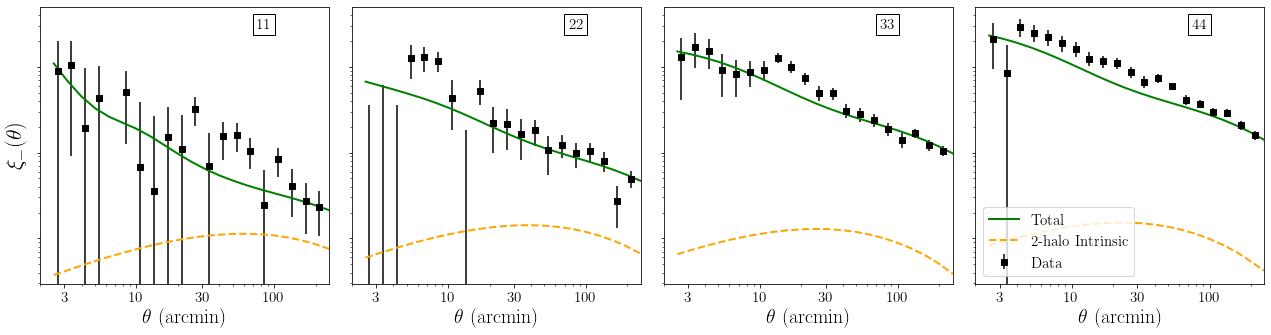

In [18]:
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
for j2 in range(4):
    bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
#     sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

#     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['totm']
#     Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, DV.xi_result_dict['kk'][bin_str]['intm'], linestyle='-', marker='',lw = 2, color ='blue',label='Total Intrinsic')  
#     ax[j2].errorbar(theta_array, DV.xi_result_dict['kk'][bin_str]['1hintm'], linestyle='--', marker='',lw = 2, color ='red',label='1-halo Intrinsic')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['kk'][bin_str]['2hintm'], linestyle='--', marker='',lw = 2, color ='orange',label='2-halo Intrinsic')  



#     ax[j2].errorbar(xip_ang[sel_ind], xip_csf[sel_ind], linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



    yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xim']
    yk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
    yk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err_m']
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Y3')
    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Data')
#     ax[j2].set_yticklabels([])



#     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
#     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
#     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
#     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
#     ax[j2].set_ylim(1e-11,1e-9)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,str(j2+1) + str(j2+1), verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
    ax[j2].set_yticklabels([])

    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{-}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')





No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


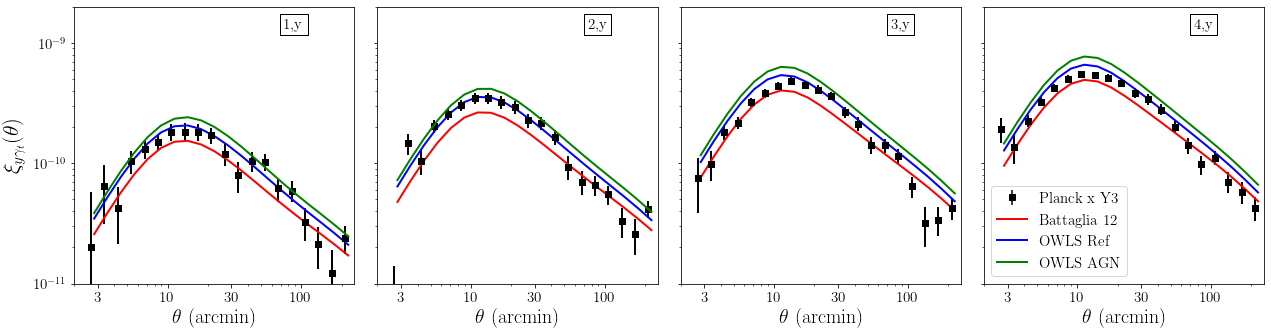

In [21]:
import scipy.interpolate as interpolate
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
fnames = [
    'DV_obj_temp_kk_gty_plancky3_beamed_B12.pk',  
    'DV_obj_temp_kk_gty_plancky3_beamed_ref.pk',
    'DV_obj_temp_kk_gty_plancky3_beamed_AGN.pk',
]

labels = ['Battaglia 12','OWLS Ref','OWLS AGN']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')

do_residuals = 0


for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        theta_array = DV.xi_result_dict['gty']['theta']
        bin_str = 'bin_' + str(j2+1) + '_' + str(0)

        Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
        yk_g = df['Yshear_y3'][str(j2)]['xip']
        yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
        yk_err = df['Yshear_y3'][str(j2)]['err_p']


        if do_residuals:
            Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')

            Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
            if jf == 0:
                Cl_d_th_ref = Cl_d_th

            if jf == 0:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label='Planck x Y3')
            else:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')
            ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  

        else:
            if jf == 0:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Planck x Y3')
            else:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


            ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  



        ax[j2].set_xscale('log')

        if do_residuals:
            ax[j2].set_ylim(-0.8,0.8)        
        else:
            ax[j2].set_yscale('log')
            ax[j2].set_ylim(1e-11,2e-9)


        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    if do_residuals:
        ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm B12}_{y\gamma_t}$ ', size = 22)
    else:
        ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')




No handles with labels found to put in legend.


Battaglia 12
6.3 sigma
OWLS Ref
6.1 sigma
OWLS AGN
5.6 sigma
Battaglia 12
7.8 sigma
OWLS Ref
7.4 sigma
OWLS AGN
6.7 sigma
Battaglia 12
12.8 sigma
OWLS Ref
7.3 sigma
OWLS AGN
6.9 sigma
Battaglia 12
13.6 sigma
OWLS Ref
5.6 sigma
OWLS AGN
5.2 sigma


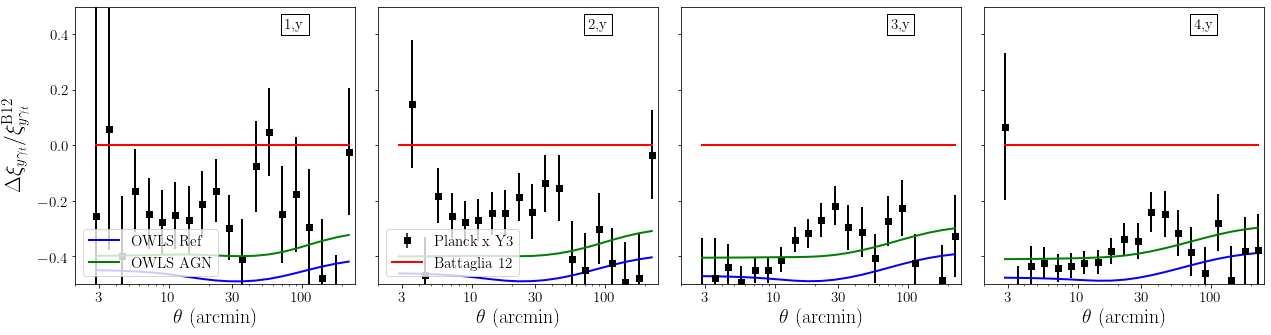

In [26]:
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
import scipy.interpolate as interpolate
ytype = 'planck'
# ytype = 'act'
do_residuals = 1


if ytype == 'act':
    fnames = [
        'DV_obj_temp_kk_gty_plancky3_beamed_B12_oct1.pk', 
        'DV_obj_temp_kk_gty_acty3_beamed_owls_onecosmo.pk',
        'DV_obj_temp_kk_gty_acty3_beamed_owlsagn_onecosmo.pk',       
    ]

    from astropy.io import fits
    actf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_Planck.fits')  
    actf['compton_shear'].header

    bin1_gty = actf['compton1_shear'].data['BIN1']
    bin2_gty = actf['compton1_shear'].data['BIN2']
    gty_csf = actf['compton1_shear'].data['VALUE']
    gty_ang = actf['compton1_shear'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
    label_yx = 'ACT x Y3'
    ylims = [-1.2,1.2]

if ytype == 'planck':
    fnames = [
#         'DV_obj_temp_kk_gty_plancky3_beamed_B12_onecosmo.pk', 
        'DV_obj_temp_kk_gty_plancky3_beamed_B12_oct1_descn1s.pk', 
        'DV_obj_temp_kk_gty_plancky3_beamed_OWLSRef_Oct1_descn1s.pk',
        'DV_obj_temp_kk_gty_plancky3_beamed_OWLSAGN_Oct1_descn1s.pk',       
    ]

    from astropy.io import fits
#     actf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_planckACT_theorycov_actmask.fits')  
    actf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_Planck.fits')  
    actf['compton_shear'].header

    bin1_gty = actf['compton_shear'].data['BIN1']
    bin2_gty = actf['compton_shear'].data['BIN2']
    gty_csf = actf['compton_shear'].data['VALUE']
    gty_ang = actf['compton_shear'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
    gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
    label_yx = 'Planck x Y3'
    ylims = [-0.5,0.5]
    
    
labels = ['Battaglia 12','OWLS Ref','OWLS AGN']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')


for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        theta_array = DV.xi_result_dict['gty']['theta']
        bin_str = 'bin_' + str(j2+1) + '_' + str(0)

        Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
        sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]
#         yk_g = df['Yshear_y3'][str(j2)]['xip']
#         yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#         yk_err = df['Yshear_y3'][str(j2)]['err_p']
        yk_g = gty_csf[sel_ind]
        yk_th_g = gty_ang[sel_ind]
        yk_err = gty_sig[sel_ind]
        cov_bin = gty_cov[sel_ind,:][:,sel_ind]
        inv_cov_bin = np.linalg.inv(cov_bin)



        if do_residuals:
            Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')

            Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
            if jf == 0:
                Cl_d_th_ref = Cl_d_th
            
            diff = np.array([yk_g - Cl_d_th])
            snr_bin = np.sqrt(np.dot(diff,np.dot(inv_cov_bin,diff.T)))
            print(labels[jf])
            print(str(np.round(snr_bin[0][0],1)) + ' sigma')
            
            if jf == 0 and j2 == 1:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')
            
            if ((jf in [1,2]) and (j2 == 0)) or ((jf == 0) and (j2 == 1)):
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
            else:
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf])  
        else:
            if jf == 0:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


            ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  



        ax[j2].set_xscale('log')

        if do_residuals:
            ax[j2].set_ylim(ylims)        
        else:
            ax[j2].set_yscale('log')
            ax[j2].set_ylim(1e-11,2e-9)


        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    if do_residuals:
        ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm B12}_{y\gamma_t}$ ', size = 22)
    else:
        ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[0].legend(fontsize=15,loc='lower left')
    ax[1].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_sims_residual_' + str(ytype) + '.pdf')






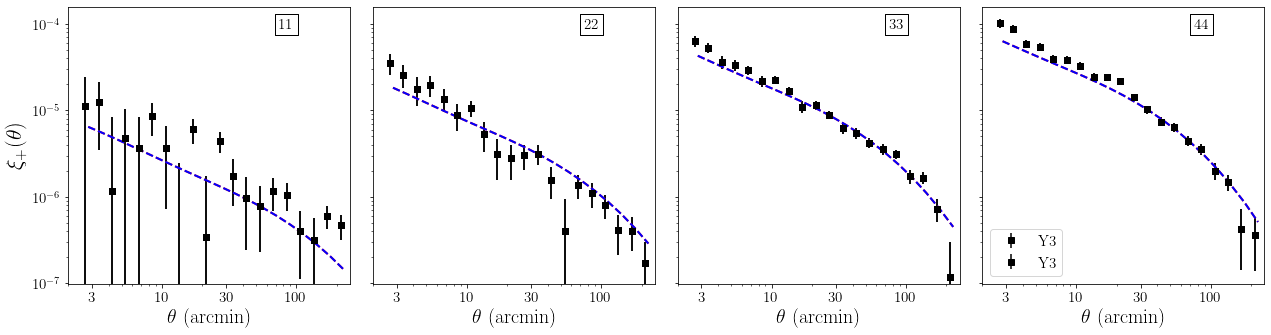

In [15]:
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
fnames = ['DV_obj_temp_gty_plancky3_beamed_P020.0_beta4.524.pk',
          'DV_obj_temp_gty_plancky3_beamed_P020.0_beta4.516.pk',
]
colors = ['r','b','k']
for jf in range(2):
    DV = dill.load(open(ldir + fnames[jf],'rb'))  
    for j2 in range(4):
        bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
        sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

    #     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
    #     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
        Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
    #     Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']

    #     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    #     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
    #     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
    #     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
        ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='--', marker='',lw = 2, color =colors[jf])  

#         ax[j2].errorbar(xip_ang[sel_ind], xip_csf[sel_ind], linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



        yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
        yk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
        yk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err_p']
        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Y3')

    #     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
    #     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
    #     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
    #     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
    #     ax[j2].set_ylim(1e-11,1e-9)
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')

        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + str(j2+1), verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



    pl.tight_layout()

    # fig.savefig('xi_yk_kk_allbins.pdf')




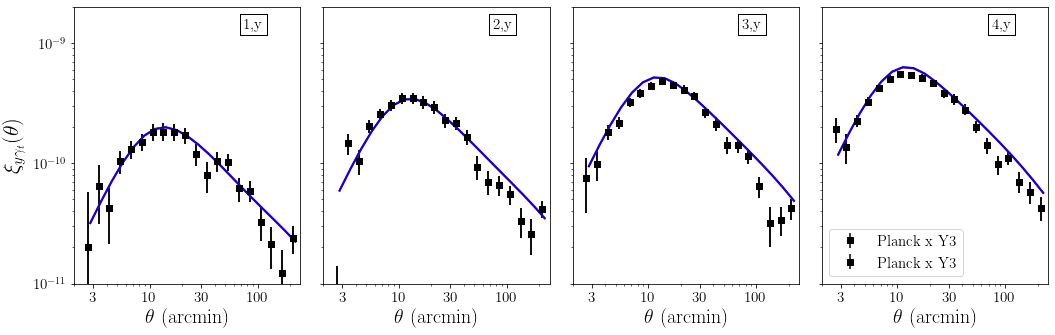

In [16]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
theta_array = DV.xi_result_dict['gty']['theta']
for jf in range(2):
    DV = dill.load(open(ldir + fnames[jf],'rb'))  


    for j2 in range(4):
        bin_str = 'bin_' + str(j2+1) + '_' + str(0)


    #     Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
    #     Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
        Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
    #     Cl_j1_tot2 = DV.xi_result_dict['gty'][bin_str]['tot2']

    #     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle=':', marker='',lw = 2, color ='blue',label='1h')
    #     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='red',label='2h Linear')
    #     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
    #     ax[j2].errorbar(theta_array, Cl_j1_tot2, linestyle='-', marker='',lw = 2, color ='green',label='Total Mead2')  
        ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf])  



        yk_g = df['Yshear_y3'][str(j2)]['xip']
        yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
        yk_err = df['Yshear_y3'][str(j2)]['err_p']
        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Planck x Y3')

    #     yk_g = df['Yshear_y1'][str(j2)]['xip']
    #     yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
    #     yk_err = df['Yshear_y1'][str(j2)]['err_p']            
    #     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
        ax[j2].set_ylim(1e-11,2e-9)
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')

        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

    pl.tight_layout()

    # fig.savefig('xi_yk_kk_allbins.pdf')



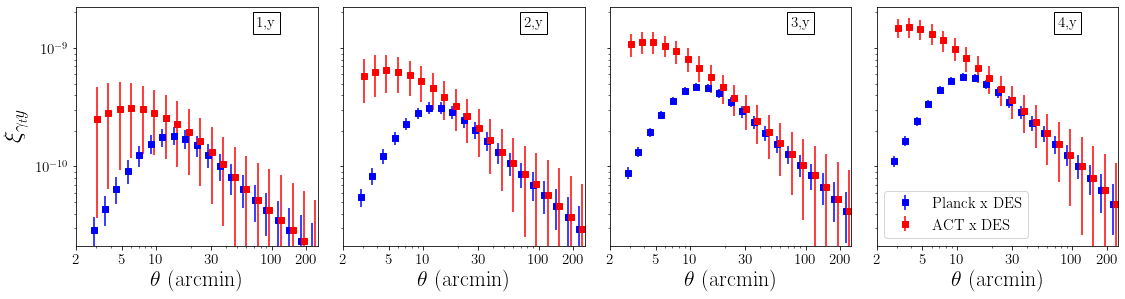

In [23]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_planckACT_theorycov_actmask.fits')

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(1,4, figsize = (16,4.5),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):
                
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

        bin1y = df['compton1_shear'].data['BIN1']
        bin2y = df['compton1_shear'].data['BIN2']
        ind_sely1 = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]


        
        if j1 == 0:
            
#             cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
#             sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
#             ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')

            yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
            yk_val = df['compton_shear'].data['VALUE'][ind_sely]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))            
            
            yk_th_g1 = df['compton1_shear'].data['ANG'][ind_sely1]
            yk_val1 = df['compton1_shear'].data['VALUE'][ind_sely1]
            yk_err1 = np.sqrt(np.diag(df['COVMAT'].data[480:,480:][ind_sely1,:][:,ind_sely1]))            

            ax[j2].errorbar(yk_th_g,yk_val, yk_err, ls='',marker='s',color='blue',label='Planck x DES')
            ax[j2].errorbar(1.07*yk_th_g1, yk_val1,yk_err1, ls='',marker='s',color='red',label='ACT x DES')
    
#             ax[j2].set_ylim(6e-12,5e-11)
            

#         ax[j1,j2].set_ylim(0.5,4.2)
#         ax[j2].axhline(1.0,ls='--',color='k')    
#             
        ax[j2].set_xscale('log')
#         if j1 == 1:
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 22)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1,j2].set_xticks(ticks)
#             ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{\gamma_t y}$ ', size = 25)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
# ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

fig.savefig('xi_ygt_planck_act_measurement_actmask.pdf')











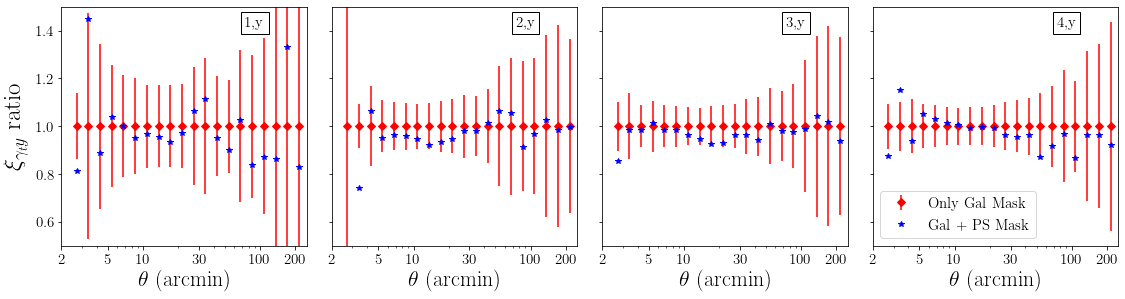

In [2]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_planckACT_theorycov_actmask.fits')

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')
sdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/simsgty/'
nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(1,4, figsize = (16,4.5),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):
                
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

        bin1y = df['compton1_shear'].data['BIN1']
        bin2y = df['compton1_shear'].data['BIN2']
        ind_sely1 = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]


        
        if j1 == 0:
#             yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
#             yk_val = df['compton_shear'].data['VALUE'][ind_sely]
#             yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))                        
#             ax[j2].errorbar(yk_th_g,yk_val/yk_val, yk_err/yk_val, ls='',marker='s',color='blue',label='Original')
            
#             save_fname = sdir + 'planck_des_gty_sbin_' + str(j2+1) + '_only_gal_mask.pk'
#             df1 = dill.load(open(save_fname,'rb'))
#             ax[j2].errorbar(np.exp(df1.meanlogr) * (180./np.pi),df1.xi/yk_val, ls='',marker='D',color='red',label='Only Gal Mask')

#             save_fname = sdir + 'planck_des_gty_sbin_' + str(j2+1) + '_with_PS_gal_mask.pk'
#             df1 = dill.load(open(save_fname,'rb'))
#             ax[j2].errorbar(np.exp(df1.meanlogr) * (180./np.pi),df1.xi/yk_val, ls='',marker='*',color='orange',label='Gal + PS Mask')

            
            yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
            yk_val = df['compton_shear'].data['VALUE'][ind_sely]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))                        
#             ax[j2].errorbar(yk_th_g,yk_val/yk_val, yk_err/yk_val, ls='',marker='s',color='blue',label='Original')
            
            save_fname = sdir + 'planck_des_gty_sbin_' + str(j2+1) + '_only_gal_mask.pk'
            df1 = dill.load(open(save_fname,'rb'))
            ax[j2].errorbar(np.exp(df1.meanlogr) * (180./np.pi),df1.xi/df1.xi, yk_err/df1.xi, ls='',marker='D',color='red',label='Only Gal Mask')

            save_fname = sdir + 'planck_des_gty_sbin_' + str(j2+1) + '_with_PS_gal_mask.pk'
            df2 = dill.load(open(save_fname,'rb'))
            ax[j2].errorbar(np.exp(df2.meanlogr) * (180./np.pi),df2.xi/df1.xi, ls='',marker='*',color='blue',label='Gal + PS Mask')

            
            
#             ax[j2].errorbar(1.07*yk_th_g1, yk_val1,yk_err1, ls='',marker='s',color='red',label='ACT x DES')
    
#             ax[j2].set_ylim(6e-12,5e-11)
            

#         ax[j1,j2].set_ylim(0.5,4.2)
#         ax[j2].axhline(1.0,ls='--',color='k')    
#             
        ax[j2].set_xscale('log')
#         if j1 == 1:
#         ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 22)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1,j2].set_xticks(ticks)
#             ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2,250))
        ax[j2].set_ylim((0.5,1.5))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{\gamma_t y}$ ratio', size = 25)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
# ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

fig.savefig('xi_ygt_gal_vs_psmask.pdf')












No handles with labels found to put in legend.


-107.53412358842309
-107.12715220290043


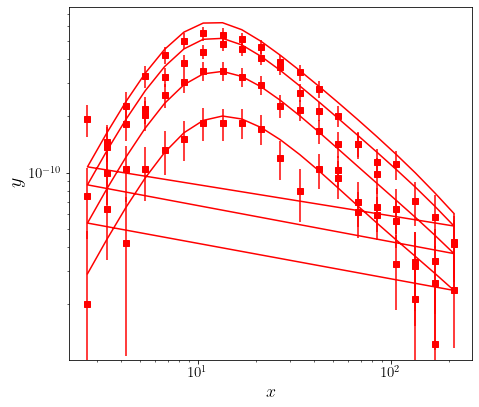

In [34]:
t1 = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/temp_1.npz')
t2 = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/temp_2.npz')

x1, yd1, yt1, sig1 = t1['xdata'], t1['ydata'], t1['yth'], np.sqrt(np.diag(np.linalg.inv(t1['invcov'])))
v1 = -0.5 * np.dot(np.dot(np.transpose((yd1 - yt1)), t1['invcov']),(yd1 - yt1))   
print(v1)
x2, yd2, yt2, sig2 = t2['xdata'], t2['ydata'], t2['yth'], np.sqrt(np.diag(np.linalg.inv(t2['invcov'])))
v2 = -0.5 * np.dot(np.dot(np.transpose((yd2 - yt2)), t2['invcov']),(yd2 - yt2))   
print(v2)


fig, ax = pl.subplots(1,1, figsize = (7,6))

ax.errorbar(x1.flatten(),yd1,sig1,ls='',marker='s',color='r')
ax.errorbar(x1.flatten(),yt1,ls='-',marker='',color='r')

# ax.errorbar(x2.flatten(),yd2,sig2,ls='',marker='s',color='b')
# ax.errorbar(x2.flatten(),yt2,ls='-',marker='',color='b')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$x$', size = 18)
ax.set_ylabel(r'$y$', size = 20)
# ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()


No handles with labels found to put in legend.


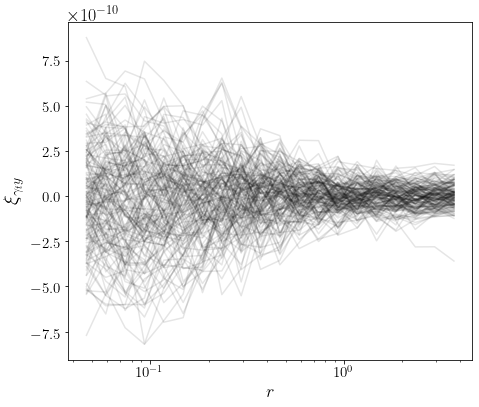

In [2]:
import os.path
import dill
sdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/simsgty/'
frange = np.arange(400)
fig, ax = pl.subplots(1,1, figsize = (7,6))
gty_all = []
for ji in range(len(frange)):
    fname = sdir + 'gty_obj_sim_' + str(ji) + '_bin4y.pkl'
    if os.path.isfile(fname):
        fgty = dill.load(open(fname,'rb'))
        gty = fgty.xi
        rgty = np.exp(fgty.logr)
#         print(ji,gty, rgty)
        ax.errorbar(rgty,gty,ls='-',marker='',color='k',alpha=0.1)
        
        if len(gty_all) == 0:
            gty_all = gty
        else:
            gty_all = np.vstack((gty_all,gty))

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$r$', size = 18)
ax.set_ylabel(r'$\xi_{\gamma_t y}$', size = 20)
# ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()



In [3]:
# gty_all
nsim, nrad = gty_all.shape
gty_mean = np.mean(gty_all,axis=0)
gty_mean_rp = np.tile(gty_mean.reshape(1,nrad),(nsim,1))

# gty_mean_rp.shape
gty_diff = gty_all - gty_mean_rp
cov_ij = (1./(nsim - 1.)) * np.dot(gty_diff.T, gty_diff)
sig_sim = np.sqrt(np.diag(cov_ij))





In [5]:
(theta_arr[ind_inth] - rgty*(180./np.pi))/(rgty*(180./np.pi))


NameError: name 'theta_arr' is not defined

In [66]:
import scipy as sp
import scipy.interpolate as interpolate

covG = DV.covG_dict['ky_ky']['bin_4_0_4_0']
l_array_survey = DV.Cl_result_dict['l_array_survey']
dl_array_survey = DV.Cl_result_dict['dl_array_survey']

covG.shape, l_array_survey.shape


cov_G_diag_interp = interpolate.interp1d(np.log(l_array_survey),
                                         np.log(dl_array_survey * np.diag(covG)),
                                         fill_value=-100.0, bounds_error=False)

l_array_full_all = np.logspace(np.log10(np.min(l_array_survey)), np.log10(np.max(l_array_survey)),
                               500000)
dl_array_full = l_array_full_all[1:] - l_array_full_all[:-1]
l_array_full = l_array_full_all[1:]

cov_G_diag_lfull = (np.exp(cov_G_diag_interp(np.log(l_array_full))))
                                         

In [67]:


def get_covdiag_gammat(theta_min, theta_max, ntheta, l_array, cov_diag):
    theta_array_all = np.logspace(np.log10(theta_min), np.log10(theta_max), ntheta)
    dtheta_array = (theta_array_all[1:] - theta_array_all[:-1]) / 2.
    theta_array = (theta_array_all[1:] + theta_array_all[:-1]) / 2.
    theta_plus_array = theta_array + dtheta_array / 2.
    theta_minus_array = theta_array - dtheta_array / 2.
    ntheta = len(theta_array)
    nl = len(l_array)

    theta_array_rad = theta_array * (np.pi / 180.) * (1. / 60.)
    dtheta_array_rad = dtheta_array * (np.pi / 180.) * (1. / 60.)
    thetaplus_array_rad = theta_plus_array * (np.pi / 180.) * (1. / 60.)
    thetaminus_array_rad = theta_minus_array * (np.pi / 180.) * (1. / 60.)

    l_mat = np.tile(l_array.reshape(1, nl), (ntheta, 1))
    theta_mat = np.tile(theta_array_rad.reshape(ntheta, 1), (1, nl))
    dtheta_mat = np.tile(dtheta_array_rad.reshape(ntheta, 1), (1, nl))
    thetaplus_mat = np.tile(thetaplus_array_rad.reshape(ntheta, 1), (1, nl))
    thetaminus_mat = np.tile(thetaminus_array_rad.reshape(ntheta, 1), (1, nl))
    l_thetaplus = l_mat * thetaplus_mat
    l_thetaminus = l_mat * thetaminus_mat

    J2_ltheta_binned_coeff = (1. / ( (l_mat**2) * theta_mat * dtheta_mat))
    term1 = -2. * (sp.special.jv(0, l_thetaplus) - sp.special.jv(0, l_thetaminus))
    term2 = -1. * l_mat * (thetaplus_mat * sp.special.jv(1, l_thetaplus) - thetaminus_mat * sp.special.jv(1, l_thetaminus))
    J2_ltheta_binned = J2_ltheta_binned_coeff * (term1 + term2)

    J2_ltheta_binned_mat1 = np.tile(J2_ltheta_binned.reshape(ntheta, 1, nl), (1, ntheta, 1))
    J2_ltheta_binned_mat2 = np.tile(J2_ltheta_binned.reshape(1, ntheta, nl), (ntheta, 1, 1))

    cov_diag_mat = np.tile(cov_diag.reshape(1, 1, nl), (ntheta, ntheta, 1))
    l_mat = np.tile(l_array.reshape(1, 1, nl), (ntheta, ntheta, 1))

    integrand = (l_mat ** 2) * (J2_ltheta_binned_mat1 * J2_ltheta_binned_mat2) * cov_diag_mat
    cov_wtheta = (1. / ((2 * np.pi) ** 2)) * sp.integrate.simps(integrand, l_array)

    return theta_array_rad, cov_wtheta


theta_rad, cov_gty_simp = get_covdiag_gammat(2.5, 250, 21, l_array_full, cov_G_diag_lfull)
theta_amin = theta_rad * (180./np.pi) * 60.




In [68]:
np.sqrt(np.diag(cov_gty_simp))




array([3.52346560e-10, 3.76843868e-10, 4.00443317e-10, 4.06875024e-10,
       3.89683204e-10, 3.57420933e-10, 3.24653161e-10, 2.92266622e-10,
       2.64586865e-10, 2.38783668e-10, 2.11301862e-10, 1.88319902e-10,
       1.69398054e-10, 1.51836122e-10, 1.35843753e-10, 1.20732243e-10,
       1.07887257e-10, 9.82880558e-11, 8.74905190e-11, 7.87542425e-11])

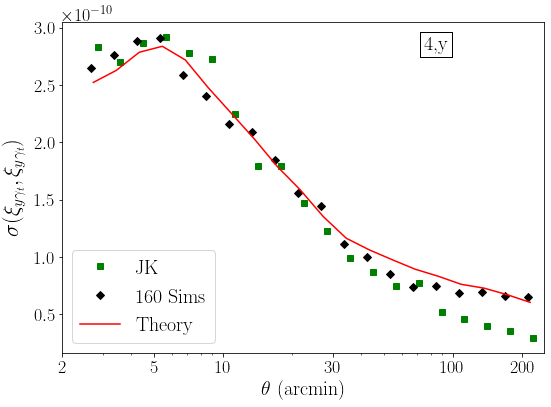

In [5]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_ACT.fits')

fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'

fnames = [
    'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_1_12000.pk',
#     'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_100_6000.pk',
#     'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_20_6000.pk'    
]
colors = ['r','b','k']
labels = [
    r'Theory',
    r'$100 < \ell < 12500$',
    r'$20 < \ell < 6000$'    
]


from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([2,2,2,2])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(1,1, figsize = (8,6),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for j2 in range(4):

    for jfn in range(len(fnames)):
        DV = dill.load(open(fdir + fnames[jfn],'rb'))  
        theta_arr = DV.fftcovtot_dict['gty_gty']['theta']

        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        ind_sel1 = np.where((bin1 == bins1[j2]))[0]
        ind_sel2 = np.where((bin2 == bins2[j2]))[0]


        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]




        cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(bins1[j2]) + '_' + str(0) + '_' + str(bins2[j2]) + '_' + str(0)]  
        sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
        ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
        
        if jfn == 0:
            sig_th_interp = interpolate.interp1d(theta_arr, sig_kk_binj2,fill_value='extrapolate')
            yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:,400:][ind_sely,:][:,ind_sely]))

#         ax[j2].plot(yk_th_g, yk_err/(sig_th_interp(yk_th_g)), ls='',marker='s',color='green')
        if j2 == 3:
            ax.plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            ax.plot(rgty*(180./np.pi), sig_sim, ls='',marker='D',color='k',label= str(nsim) + ' Sims')
            ax.plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color=colors[jfn],label=labels[jfn])  
#             ax.plot(theta_amin, np.sqrt(np.diag(cov_gty_simp)), ls='-',color='b',label='Simple Theory')  

#         ax[j2].set_ylim(6e-12,6e-10)
#         ax[j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth]/(sig_th_interp(theta_arr[ind_inth])), ls='-',color=colors[jfn],label=labels[jfn])  





#         ax[j2].set_ylim(0.99,1.005)
#         ax[j2].axhline(1.0,ls='--',color='k')    
    #             
        ax.set_xscale('log')
#         ax.set_yscale('log')
    #         if j1 == 1:
    #             ax[j1,j2].set_yscale('log')
#         ax[j2].set_yscale('log')
        ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([2,5,10,30,100,200])
        labels_bottom = ticks
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels_bottom,  fontsize=18)

        ax.tick_params(axis='both', which='minor', labelsize=18)    
        ax.tick_params(axis='both', which='major', labelsize=18)
    #         ax[0,0].legend(fontsize = 18, frameon = False)
        ax.set_xlim((2,250))


    #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax.text( 0.75, 0.96,'4,y', verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=20, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
    #         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax.set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax.legend(fontsize=20,loc='lower left')
# ax[0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')












In [70]:
Cl_kk = np.array([1.56098410e-08, 1.60837250e-08, 1.64966370e-08, 1.67605580e-08,
       1.69537508e-08, 1.70009295e-08, 1.66265548e-08, 1.59844857e-08,
       1.50716307e-08, 1.41159657e-08, 1.32800872e-08, 1.23936204e-08,
       1.12629025e-08, 1.03509550e-08, 9.69161496e-09, 9.00008047e-09,
       8.50372918e-09, 8.08247591e-09, 7.79501401e-09, 7.55342029e-09,
       7.39769338e-09, 7.28460715e-09, 7.20628669e-09, 7.15284998e-09,
       7.11611366e-09, 7.08976734e-09, 7.06955476e-09, 7.05291694e-09,
       7.03888448e-09, 7.02723684e-09, 7.01792722e-09, 7.01081123e-09,
       7.00550390e-09, 7.00167501e-09, 6.99905980e-09, 6.99737050e-09,
       6.99633858e-09, 6.99573653e-09, 6.99539785e-09, 6.99521195e-09,
       6.99511147e-09, 6.99505815e-09, 6.99503012e-09, 6.99501544e-09,
       6.99500790e-09, 6.99500402e-09])

Cl_yy = np.array([7.66764807e-53, 7.66764807e-53, 7.66764807e-53, 7.66764807e-53,
       7.66764807e-53, 7.66764807e-53, 7.66764807e-53, 7.66764807e-53,
       7.66764807e-53, 7.66764807e-53, 7.66764807e-53, 1.41519950e-15,
       9.66114379e-16, 6.59537397e-16, 4.50246459e-16, 3.07369794e-16,
       2.58383391e-16, 2.47095006e-16, 2.37960758e-16, 2.26613872e-16,
       1.25239144e-16, 1.55091033e-16, 1.05179139e-16, 7.43976894e-17,
       6.19943172e-17, 5.16329773e-17, 5.07136399e-17, 4.78157947e-17,
       3.36294698e-17, 3.34075717e-17, 3.25640447e-17, 2.56128145e-17,
       2.00453605e-17, 1.06161385e-17, 4.21204813e-18, 2.01702389e-18,
       1.51865584e-18, 1.30984021e-18, 1.01642485e-18, 7.35745588e-19,
       4.53937881e-19, 7.66764807e-53, 7.66764807e-53, 7.66764807e-53,
       7.66764807e-53, 7.66764807e-53])


Cl_ky = np.array([1.19052236e-12, 1.17585163e-12, 1.14054522e-12, 1.06982840e-12,
       1.02001981e-12, 9.85597483e-13, 9.04338175e-13, 8.26881862e-13,
       7.31325287e-13, 6.41224437e-13, 5.67708192e-13, 4.94492049e-13,
       4.03040806e-13, 3.28135455e-13, 2.72475418e-13, 2.13752781e-13,
       1.69230114e-13, 1.30545855e-13, 1.01590541e-13, 7.68415709e-14,
       5.94462068e-14, 4.62361359e-14, 3.64736057e-14, 2.90228605e-14,
       2.30585595e-14, 1.80731569e-14, 1.38016948e-14, 1.01633949e-14,
       7.19342629e-15, 4.90832038e-15, 3.24678088e-15, 2.07749704e-15,
       1.26468147e-15, 7.23579701e-16, 3.87525823e-16, 1.93007691e-16,
       8.82974704e-17, 3.61305958e-17, 1.26479861e-17, 3.47917093e-18,
       6.58133290e-19, 7.06393962e-20, 3.16558277e-21, 3.62225304e-23,
       4.70904360e-26, 1.95163405e-30])




In [72]:
((Cl_kk * Cl_yy) + (Cl_ky**2))/(Cl_kk * Cl_yy)



array([1.18417111e+36, 1.12113069e+36, 1.02841269e+36, 8.90589562e+35,
       8.00367133e+35, 7.45185394e+35, 6.41500928e+35, 5.57861117e+35,
       4.62805770e+35, 3.79880818e+35, 3.16509846e+35, 1.01394128e+00,
       1.01492860e+00, 1.01577199e+00, 1.01701407e+00, 1.01651642e+00,
       1.01303411e+00, 1.00853332e+00, 1.00556396e+00, 1.00344955e+00,
       1.00381427e+00, 1.00189221e+00, 1.00175516e+00, 1.00158286e+00,
       1.00120523e+00, 1.00089230e+00, 1.00053131e+00, 1.00030629e+00,
       1.00021860e+00, 1.00010262e+00, 1.00004613e+00, 1.00002404e+00,
       1.00001139e+00, 1.00000704e+00, 1.00000509e+00, 1.00000264e+00,
       1.00000073e+00, 1.00000014e+00, 1.00000002e+00, 1.00000000e+00,
       1.00000000e+00, 9.30337349e+21, 1.86833860e+19, 2.44628314e+15,
       4.13442428e+09, 8.10144346e+00])

In [73]:
l_array_survey


array([1.12945735e+00, 1.42189046e+00, 1.79003880e+00, 2.25350616e+00,
       2.83697203e+00, 3.57150579e+00, 4.49622113e+00, 5.66035888e+00,
       7.12590899e+00, 8.97091158e+00, 1.12936124e+01, 1.42176947e+01,
       1.78988649e+01, 2.25331441e+01, 2.83673063e+01, 3.57120189e+01,
       4.49583855e+01, 5.65987724e+01, 7.12530265e+01, 8.97014825e+01,
       1.12926515e+02, 1.42164849e+02, 1.78973419e+02, 2.25312268e+02,
       2.83648926e+02, 3.57089802e+02, 4.49545600e+02, 5.65939564e+02,
       7.12469637e+02, 8.96938498e+02, 1.12916906e+03, 1.42152753e+03,
       1.78958190e+03, 2.25293096e+03, 2.83624790e+03, 3.57059417e+03,
       4.49507349e+03, 5.65891409e+03, 7.12409013e+03, 8.96862178e+03,
       1.12907298e+04, 1.42140657e+04, 1.78942963e+04, 2.25273926e+04,
       2.83600657e+04, 3.57029035e+04])

In [60]:

print(theta_amin)
print(np.log(theta_amin[1:]) - np.log(theta_amin[:-1]))


[  2.82365676   3.55477326   4.47519438   5.63393593   7.09270511
   8.92918671  11.24118005  14.15180723  17.81606974  22.42910293
  28.23656765  35.54773255  44.75194384  56.33935933  70.92705115
  89.29186707 112.41180052 141.51807226 178.1606974  224.29102934]
[0.23025851 0.23025851 0.23025851 0.23025851 0.23025851 0.23025851
 0.23025851 0.23025851 0.23025851 0.23025851 0.23025851 0.23025851
 0.23025851 0.23025851 0.23025851 0.23025851 0.23025851 0.23025851
 0.23025851]


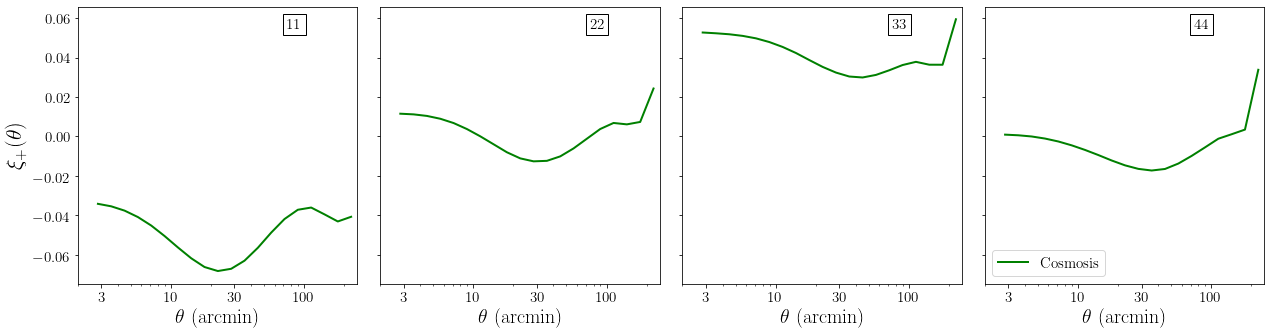

In [32]:
import scipy.interpolate as interpolate
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
for j2 in range(4):
    bin_str = 'bin_' + str(j2+1) + '_' + str(j2+1)
    sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

#     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
    Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']
    Cl_interp = interpolate.interp1d(theta_array,np.log(Cl_j1_tot2),fill_value='extrapolate')
    Cl_cs = np.exp(Cl_interp(xip_ang[sel_ind]))

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot2, linestyle='--', marker='',lw = 2, color ='red',label='Total')  

    ax[j2].errorbar(xip_ang[sel_ind], (Cl_cs - xip_csf[sel_ind])/(xip_csf[sel_ind] ), linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



    yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
    yk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
    yk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err_p']
#     ax[j2].errorbar(yk_th_g, (yk_g - xip_csf[sel_ind])/(xip_csf[sel_ind]),yerr=yk_err/xip_csf[sel_ind], ls='',marker='s',color='black',label='Y3')

#     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
#     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
#     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
#     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
#     ax[j2].set_ylim(1e-11,1e-9)
    ax[j2].set_xscale('log')
#     ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,str(j2+1) + str(j2+1), verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')







In [5]:
def covariance_jck(TOTAL_PHI,jk_r,type_cov):
  if type_cov=='jackknife':
      fact=(jk_r-1.)/(jk_r)
  elif type_cov=='bootstrap':
      fact=1./(jk_r)
  #  Covariance estimation
  average=np.zeros(TOTAL_PHI.shape[0])
  cov_jck=np.zeros((TOTAL_PHI.shape[0],TOTAL_PHI.shape[0]))
  err_jck=np.zeros(TOTAL_PHI.shape[0])
  for kk in range(jk_r):
    average+=TOTAL_PHI[:,kk]
  average=average/(jk_r)
 # print average
  for ii in range(TOTAL_PHI.shape[0]):
     for jj in range(ii+1):
          for kk in range(jk_r):
            cov_jck[jj,ii]+=TOTAL_PHI[ii,kk]*TOTAL_PHI[jj,kk]
          cov_jck[jj,ii]=(-average[ii]*average[jj]*jk_r+cov_jck[jj,ii])*fact
          cov_jck[ii,jj]=cov_jck[jj,ii]
  for ii in range(TOTAL_PHI.shape[0]):
   err_jck[ii]=np.sqrt(cov_jck[ii,ii])
 # print err_jck
  #compute correlation
  corr=np.zeros((TOTAL_PHI.shape[0],TOTAL_PHI.shape[0]))
  for i in range(TOTAL_PHI.shape[0]):
      for j in range(TOTAL_PHI.shape[0]):
        corr[i,j]=cov_jck[i,j]/(np.sqrt(cov_jck[i,i]*cov_jck[j,j]))
  average=average*fact
  return {'cov' : cov_jck,
          'err' : err_jck,
          'corr':corr,
          'mean':average}



bin:  1
Planck  S/N: 12.10
ACT  S/N: 8.19

bin:  2
Planck  S/N: 14.33
ACT  S/N: 7.27

bin:  3
Planck  S/N: 16.39
ACT  S/N: 9.98

bin:  4
Planck  S/N: 17.89
ACT  S/N: 10.27



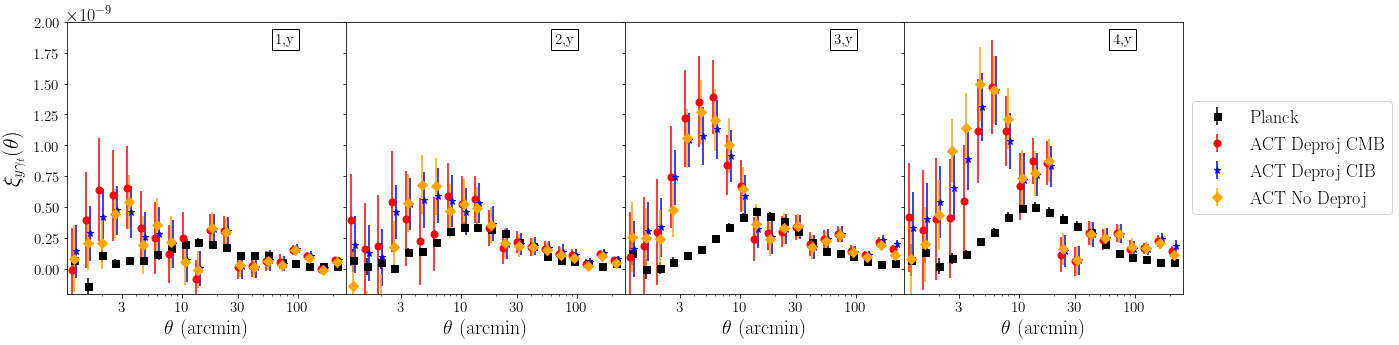

In [4]:
import pickle
def load_obj(name):
    try:
        with open(name + '.pkl', 'rb') as f:
            return pickle.load(f)#, encoding='latin1')
    except:
        with open(name + '.pkl', 'rb') as f:
            return pickle.load(f, encoding='latin1')

colors = ['#601A4A', '#EE442F','#63ACBE']
import matplotlib.pyplot as plt
path_save = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20'
path_save = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20_newACT/'
fig, ax = pl.subplots(1,4, figsize = (20,5), gridspec_kw = {'wspace':0, 'hspace':0},sharey=True, sharex=True)
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for i in range(4):
    #theta = y3['Yshear_y3']['{0}'.format(i)]['theta']*60.
    #xi = y3['Yshear_y3']['{0}'.format(i)]['xip']
    #xi_err = y3['Yshear_y3']['{0}'.format(i)]['err_p']
    #ax[i].errorbar(theta,xi,xi_err, label='planck')
    print ('bin: ',i+1)
    y3_ACT = load_obj(path_save +'/_Yshear_{0}__tsz__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[i].errorbar(theta,xi,xi_err,label='Planck',fmt='s',markersize=7,color='black')
    ax[i].set_xscale('log', nonposx='clip')
    #ax[1,i].plot(theta,xi_err,label='planck')
    #ax[1,i].set_xscale('log', nonposx='clip')
    sn = np.matmul((xi),np.matmul(np.linalg.inv(dd['cov']),xi))
    print ('Planck  S/N: {0:2.2f}'.format(np.sqrt(sn)))
    y3_ACT = load_obj(path_save +'/_YACT_cmb_shear_{0}__tsz_ACT_cmb__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[i].errorbar(0.96*theta,xi,xi_err,label='ACT Deproj CMB',fmt='o',markersize=7,color='red')
    ax[i].set_xscale('log', nonposx='clip')
    y3_ACT = load_obj(path_save +'/_YACT_cib_shear_{0}__tsz_ACT_cib__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[i].errorbar(1.04*theta,xi,xi_err,label='ACT Deproj CIB',fmt='*', markersize=7,color='blue')
    ax[i].set_xscale('log', nonposx='clip')
    ##
    ##
    y3_ACT = load_obj(path_save +'/_YACT_shear_{0}__tsz_ACT__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[i].errorbar(theta,xi,xi_err,label='ACT No Deproj',fmt='D', markersize=7,color='orange')
    ax[i].set_xscale('log', nonposx='clip')
    #ax[1,i].plot(theta,xi_err,label='act')
    #ax[1,i].set_xscale('log', nonposx='clip')
    sn = np.matmul(xi,np.matmul(np.linalg.inv(dd['cov']),xi))
    print ('ACT  S/N: {0:2.2f}'.format(np.sqrt(sn)))
    print ('')
    ax[i].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(labels_bottom,  fontsize=15)

    ax[i].tick_params(axis='both', which='minor', labelsize=15)    
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].set_xlim((2,250))
    ax[i].text( 0.75, 0.96,texts_ky[i], verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
ax[0].set_ylim(-2e-10,2e-9)
ax[0].set_xlim(1.0,260.)    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xscale('log', nonposx='clip')





In [17]:
mute = load_obj('/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20_newACT/_YACTYACT__YY_ACTACT__tsz')
dd = covariance_jck(mute['high']['corr_jckp'].T,200,'jackknife')
cov_yy = dd['cov']
sig_yy = np.sqrt(np.diag(cov_yy))
theta_yy = mute['high']['theta']* 180./np.pi


In [18]:
theta_yy


array([  1.09627594,   1.44483044,   1.9042058 ,   2.50963686,
         3.30756116,   4.35918082,   5.74515678,   7.57179566,
         9.97920365,  13.15203289,  17.33364455,  22.84477511,
        30.10813727,  39.68084281,  52.29713389,  68.92470068,
        90.83890473, 119.72060135, 157.7850639 , 207.95189891])

In [19]:
np.log(theta_yy[1:]) - np.log(theta_yy[:-1])




array([0.27607305, 0.27607305, 0.27607305, 0.27607305, 0.27607305,
       0.27607305, 0.27607305, 0.27607305, 0.27607305, 0.27607305,
       0.27607305, 0.27607305, 0.27607305, 0.27607305, 0.27607305,
       0.27607305, 0.27607305, 0.27607305, 0.27607305])

In [33]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_act_wNGcov_fskyprod_yytot.pk','rb')) 
theta_arr = DV.fftcovtot_dict['yy_yy']['theta']
ind_inth = np.where((theta_arr > 1.0) &  (theta_arr < 210.))[0]

cov_yy_th = DV.fftcovtot_dict['yy_yy']['bin_' + str(0) + '_' + str(0) + '_' + str(0) + '_' + str(0)]
sig_yy_th_ng = np.sqrt(np.diag(cov_yy_th))

DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_act_wGcov_fskyprod_yytot.pk','rb')) 
theta_arr = DV.fftcovtot_dict['yy_yy']['theta']
ind_inth = np.where((theta_arr > 1.0) &  (theta_arr < 210.))[0]

cov_yy_th = DV.fftcovtot_dict['yy_yy']['bin_' + str(0) + '_' + str(0) + '_' + str(0) + '_' + str(0)]
sig_yy_th_g = np.sqrt(np.diag(cov_yy_th))


DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_act_wcov_fskyprod_yytot.pk','rb')) 
theta_arr = DV.fftcovtot_dict['yy_yy']['theta']
ind_inth = np.where((theta_arr > 1.0) &  (theta_arr < 210.))[0]

cov_yy_th = DV.fftcovtot_dict['yy_yy']['bin_' + str(0) + '_' + str(0) + '_' + str(0) + '_' + str(0)]
sig_yy_th_tot = np.sqrt(np.diag(cov_yy_th))







/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [31]:
np.log(theta_arr[1:]) - np.log(theta_arr[:-1])


array([0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073, 0.276073, 0.276073,
       0.276073, 0.276073, 0.276073, 0.276073])

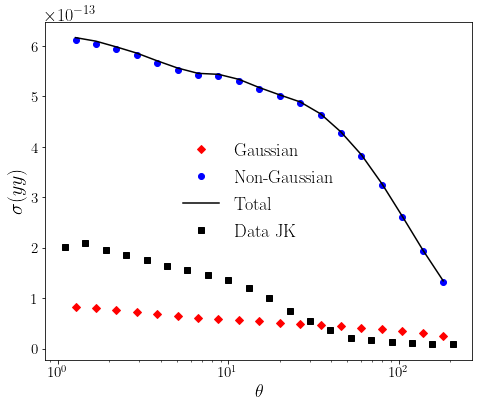

In [35]:
fig, ax = pl.subplots(1,1, figsize = (7,6))


ax.plot(theta_arr[ind_inth], sig_yy_th_g[ind_inth], ls='',marker='D',color='r',label='Gaussian')
ax.plot(theta_arr[ind_inth], sig_yy_th_ng[ind_inth], ls='',marker='o',color='b',label='Non-Gaussian')
ax.plot(theta_arr[ind_inth], sig_yy_th_tot[ind_inth], ls='-',marker='',color='k',label='Total')
ax.plot((mute['high']['theta']) * 180./np.pi, sig_yy, ls='', marker='s',color='k',label='Data JK')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'$\sigma(yy)$', size = 20)
# ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()






In [46]:
pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/compare_pkmm_cs_yx_wdndm_wmead.pk','rb'))
pkmm_yx.keys()



dict_keys(['k', 'z', 'Pk1h', 'Pk2h', 'Pktot', 'Pk1h_block', 'z_bl', 'k_bl', 'Pk1h_cs', 'Pk2h_cs', 'Pktot_cs', 'dndm', 'nu', 'M', 'gnu'])

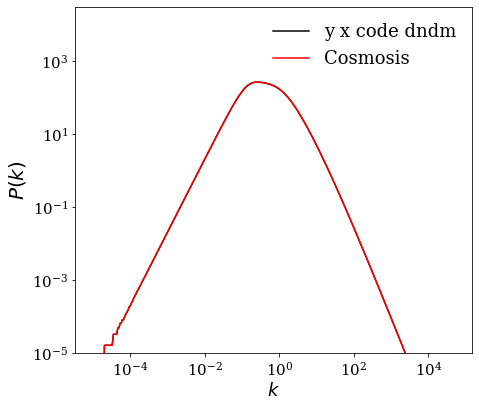

In [47]:
from scipy import interpolate
zv = 0.2
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_yx['z_bl'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk1h_cs'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk2h_cs'][ind_zv_cs,:])



fig, ax = pl.subplots(1,1, figsize = (7,6))

# ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
# ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),ls='-',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:],label=r'y x code dndm',ls='-',marker='',elinewidth=2.0,color='black')
# ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h_block'][ind_zv_yx,:],label=r'y x code',ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk1h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()




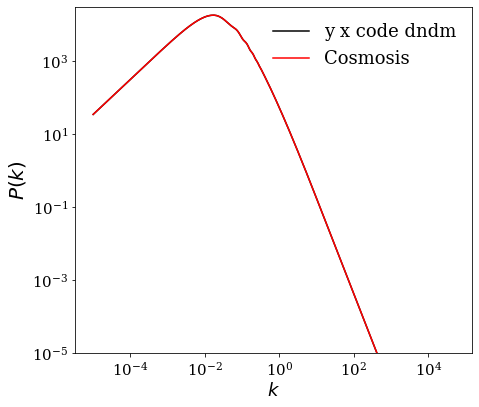

In [48]:
from scipy import interpolate
zv = 0.2
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_yx['z_bl'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk1h_cs'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_yx['k_bl'],pkmm_yx['Pk2h_cs'][ind_zv_cs,:])

fig, ax = pl.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],label=r'y x code dndm',ls='-',marker='',elinewidth=2.0,color='black')
ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()






In [90]:
sige = np.array([0.247, 0.266, 0.263, 0.314])
neff = np.array([ 1.476, 1.479, 1.484, 1.461])
arcmin2rad = (1./60.)*(np.pi/180.)
noisek = 2.*((sige**2)/(neff))*(arcmin2rad**2)




In [91]:
print(noisek)



[6.99503318e-09 8.09612732e-09 7.88787148e-09 1.14206628e-08]


In [103]:
DV.covtot_dict.keys()



dict_keys(['ky_ky', 'ky_kk', 'kk_kk'])

In [47]:
DV.covtot_dict['gty_gty'].keys()



KeyError: 'gty_gty'

In [48]:
DV.fftcovtot_dict['gty_kk'].keys()



dict_keys(['bin_1_0_1_1', 'theta', 'bin_1_0_1_2', 'bin_1_0_1_3', 'bin_1_0_1_4', 'bin_1_0_2_2', 'bin_1_0_2_3', 'bin_1_0_2_4', 'bin_1_0_3_3', 'bin_1_0_3_4', 'bin_1_0_4_4', 'bin_2_0_1_1', 'bin_2_0_1_2', 'bin_2_0_1_3', 'bin_2_0_1_4', 'bin_2_0_2_2', 'bin_2_0_2_3', 'bin_2_0_2_4', 'bin_2_0_3_3', 'bin_2_0_3_4', 'bin_2_0_4_4', 'bin_3_0_1_1', 'bin_3_0_1_2', 'bin_3_0_1_3', 'bin_3_0_1_4', 'bin_3_0_2_2', 'bin_3_0_2_3', 'bin_3_0_2_4', 'bin_3_0_3_3', 'bin_3_0_3_4', 'bin_3_0_4_4', 'bin_4_0_1_1', 'bin_4_0_1_2', 'bin_4_0_1_3', 'bin_4_0_1_4', 'bin_4_0_2_2', 'bin_4_0_2_3', 'bin_4_0_2_4', 'bin_4_0_3_3', 'bin_4_0_3_4', 'bin_4_0_4_4', 'bins_comb'])

In [53]:
DV.fftcovtot_dict['kk_kk'].keys()


dict_keys(['bin_1_1_1_1', 'theta', 'bin_1_1_1_2', 'bin_1_1_1_3', 'bin_1_1_1_4', 'bin_1_1_2_2', 'bin_1_1_2_3', 'bin_1_1_2_4', 'bin_1_1_3_3', 'bin_1_1_3_4', 'bin_1_1_4_4', 'bin_1_2_1_1', 'bin_1_2_1_2', 'bin_1_2_1_3', 'bin_1_2_1_4', 'bin_1_2_2_2', 'bin_1_2_2_3', 'bin_1_2_2_4', 'bin_1_2_3_3', 'bin_1_2_3_4', 'bin_1_2_4_4', 'bin_1_3_1_1', 'bin_1_3_1_2', 'bin_1_3_1_3', 'bin_1_3_1_4', 'bin_1_3_2_2', 'bin_1_3_2_3', 'bin_1_3_2_4', 'bin_1_3_3_3', 'bin_1_3_3_4', 'bin_1_3_4_4', 'bin_1_4_1_1', 'bin_1_4_1_2', 'bin_1_4_1_3', 'bin_1_4_1_4', 'bin_1_4_2_2', 'bin_1_4_2_3', 'bin_1_4_2_4', 'bin_1_4_3_3', 'bin_1_4_3_4', 'bin_1_4_4_4', 'bin_2_2_1_1', 'bin_2_2_1_2', 'bin_2_2_1_3', 'bin_2_2_1_4', 'bin_2_2_2_2', 'bin_2_2_2_3', 'bin_2_2_2_4', 'bin_2_2_3_3', 'bin_2_2_3_4', 'bin_2_2_4_4', 'bin_2_3_1_1', 'bin_2_3_1_2', 'bin_2_3_1_3', 'bin_2_3_1_4', 'bin_2_3_2_2', 'bin_2_3_2_3', 'bin_2_3_2_4', 'bin_2_3_3_3', 'bin_2_3_3_4', 'bin_2_3_4_4', 'bin_2_4_1_1', 'bin_2_4_1_2', 'bin_2_4_1_3', 'bin_2_4_1_4', 'bin_2_4_2_2', 'bin_

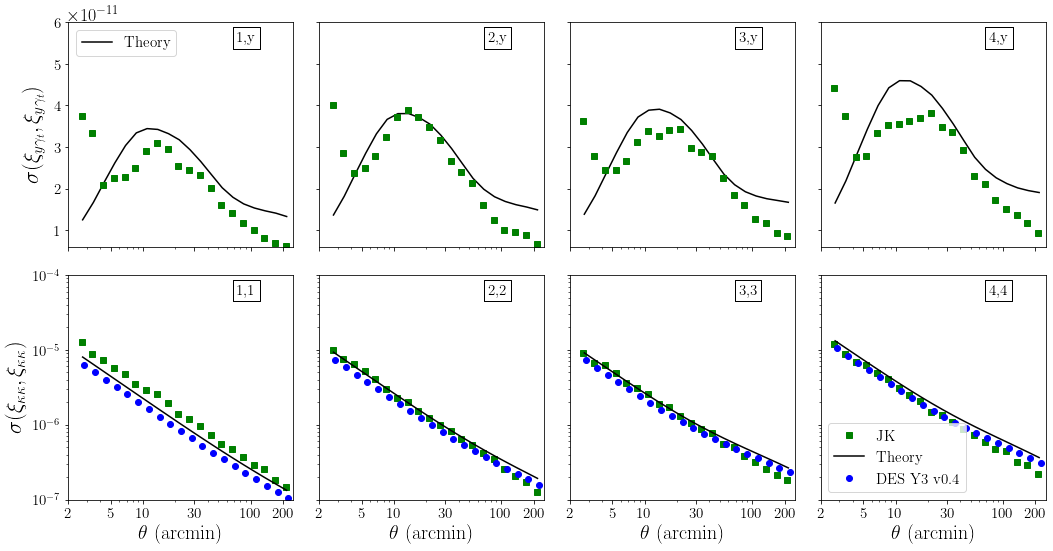

In [12]:
from twobessel import *
import matplotlib.pyplot as plt

def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'

DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_planck_wcov.pk','rb'))  
theta_arr = DV.fftcovtot_dict['kk_kk']['theta']

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))

        if j1 == 0:
            cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')


            
#             if isodd:
#                 cov_total = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='--',color='k',label='Gaussian')
            
            
#             if isodd:
#                 cov_total = block_res['covng_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covng_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls=':',color='k',label='Non-Gaussian')
            
            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err_p']
            
#             yk_cov = df['Yshear_y1'][str(j2)]['cov']
#             inv_cov_bin = QR_inverse(yk_cov)
#             snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
#             print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
            ax[j1,j2].set_ylim(6e-12,6e-11)
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y3'][str(j2)+'_'+str(j2)]['err_p']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            

            cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')



            
#             if isodd:
#                 cov_total = block_res['covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='--',color='k')
            
            
#             if isodd:
#                 cov_total = block_res['covng_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
#             else:
#                 cov_total = block_res['covng_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
#             t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls=':',color='k')
            
            
            ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
            ax[j1,j2].set_ylim(1e-7,1e-4)


#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            
        ax[j1,j2].set_xscale('log')
        if j1 == 1:
            ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')






In [15]:
covf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_Planck_theorycov_theorydv.fits')['COVMAT'].data



Text(0.5, 1.0, '$\\mathcal{C}(\\langle \\gamma_t y \\rangle,\\langle \\gamma_t y \\rangle)$')

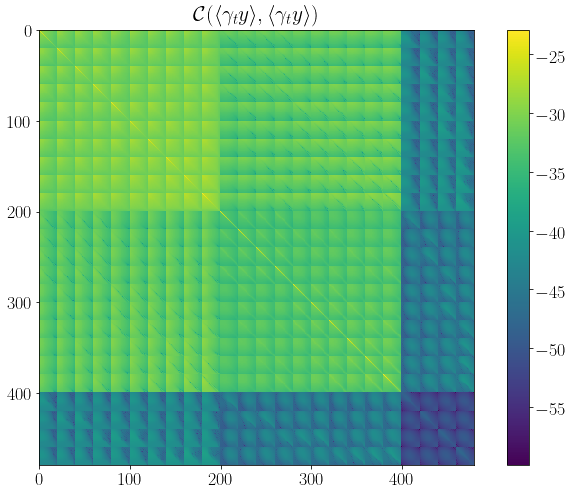

In [16]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(np.log(np.abs(covf)))
pl.colorbar()
pl.title(r'$\mathcal{C}(\langle \gamma_t y \rangle,\langle \gamma_t y \rangle)$')




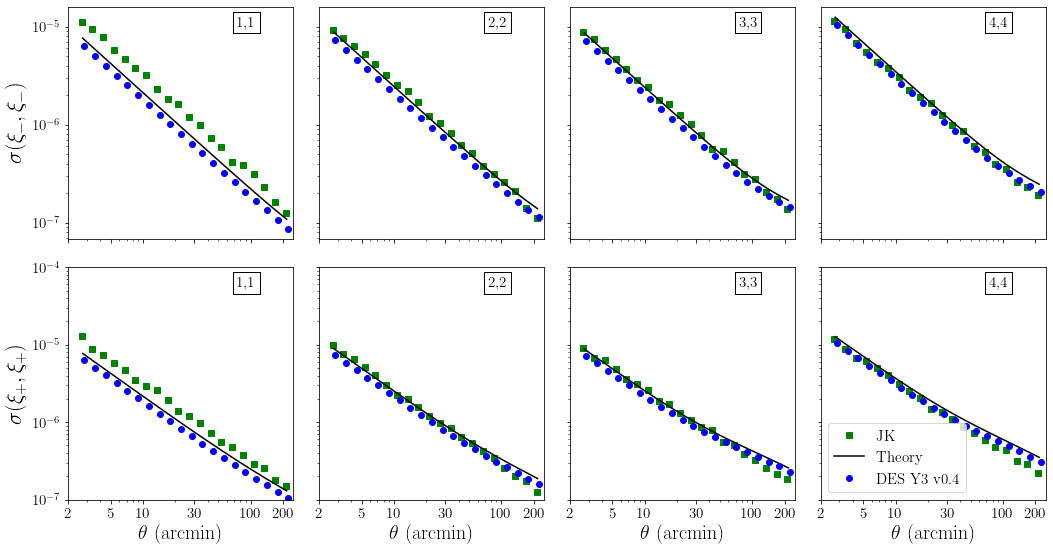

In [12]:
from twobessel import *
import matplotlib.pyplot as plt

def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'

DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_wcov.pk','rb'))  
theta_arr = DV.fftcovtot_dict['kk_kk']['theta']

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
# bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])

bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])



# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins1[j2]))[0]
        ind_sel2 = np.where((bin2 == bins2[j2]))[0]

        if j1 == 0:
            data_val = desy1['xim'].data['VALUE'][ind_sel]
            data_ang = desy1['xim'].data['ANG'][ind_sel]
            cov = desy1['COVMAT'].data[200:400,200:400][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xim']
                yk_th_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['err_m']
            except:
                yk_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xim']
                yk_th_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['err_m']

            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            try:
                cov_kk_binj2 = DV.fftcovtot_dict['kkm_kkm']['bin_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2])]   
            except:
                cov_kk_binj2 = DV.fftcovtot_dict['kkm_kkm']['bin_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2])]   

            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')
            ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')



#             cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
#             sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
#             ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')


#             yk_g = df['Yshear_y3'][str(j2)]['xip']
#             yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#             yk_err = df['Yshear_y3'][str(j2)]['err_p']
            
#             ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
#             ax[j1,j2].set_ylim(6e-12,6e-11)
            
            
            
        if j1 == 1:
            data_val = desy1['xip'].data['VALUE'][ind_sel]
            data_ang = desy1['xip'].data['ANG'][ind_sel]
            cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
    #         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xip']
                yk_th_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['err_p']
            except:
                yk_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xip']
                yk_th_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['err_p']

            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            try:
                cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2])]   
            except:
                cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2])]   
            
#             try:
#                 cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins1[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins2[j2])]   
#             except:
#                 cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins2[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins1[j2])]   


            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')


            ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
            ax[j1,j2].set_ylim(1e-7,1e-4)
            
        ax[j1,j2].set_xscale('log')
#         if j1 == 1:
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')







No handles with labels found to put in legend.


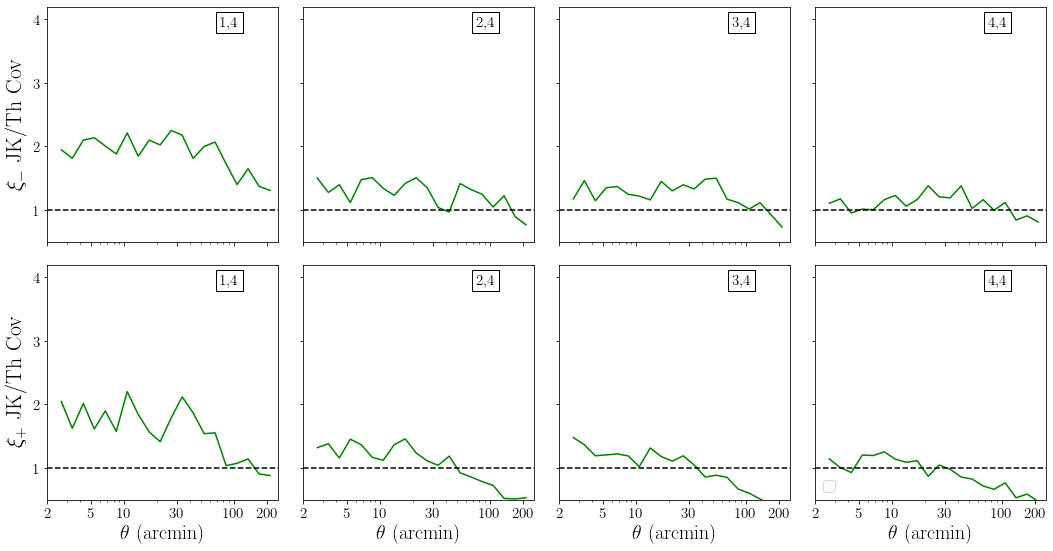

In [8]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'

DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_wcov.pk','rb'))  
theta_arr = DV.fftcovtot_dict['kk_kk']['theta']

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
bins2 = np.array([4,4,4,4])
# bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins1[j2]))[0]
        ind_sel2 = np.where((bin2 == bins2[j2]))[0]

        if j1 == 0:
            data_val = desy1['xim'].data['VALUE'][ind_sel]
            data_ang = desy1['xim'].data['ANG'][ind_sel]
            cov = desy1['COVMAT'].data[200:400,200:400][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xim']
                yk_th_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['err_m']
            except:
                yk_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xim']
                yk_th_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['err_m']

            
            
            try:
                cov_kk_binj2 = DV.fftcovtot_dict['kkm_kkm']['bin_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2])]   
            except:
                cov_kk_binj2 = DV.fftcovtot_dict['kkm_kkm']['bin_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2])]   

            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')
            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')
#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')



#             cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
#             sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
#             ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')


#             yk_g = df['Yshear_y3'][str(j2)]['xip']
#             yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#             yk_err = df['Yshear_y3'][str(j2)]['err_p']
            
#             ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
#             ax[j1,j2].set_ylim(6e-12,6e-11)
            
            
            
        if j1 == 1:
            data_val = desy1['xip'].data['VALUE'][ind_sel]
            data_ang = desy1['xip'].data['ANG'][ind_sel]
            cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
    #         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xip']
                yk_th_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['err_p']
            except:
                yk_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xip']
                yk_th_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['err_p']

#             ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            try:
                cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2])]   
            except:
                cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2])]   
            
#             try:
#                 cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins1[j2]) + '_' + str(bins1[j2]) + '_' + str(bins2[j2]) + '_' + str(bins2[j2])]   
#             except:
#                 cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(bins2[j2]) + '_' + str(bins2[j2]) + '_' + str(bins1[j2]) + '_' + str(bins1[j2])]   


            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')


#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')


        ax[j1,j2].set_ylim(0.5,4.2)
        ax[j1,j2].axhline(1.0,ls='--',color='k')    
#             
        ax[j1,j2].set_xscale('log')
#         if j1 == 1:
#         ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{-}$ JK/Th Cov', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{+}$ JK/Th Cov', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')








In [14]:
df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_Planck.fits')
df['COVMAT'].data.shape


(480, 480)

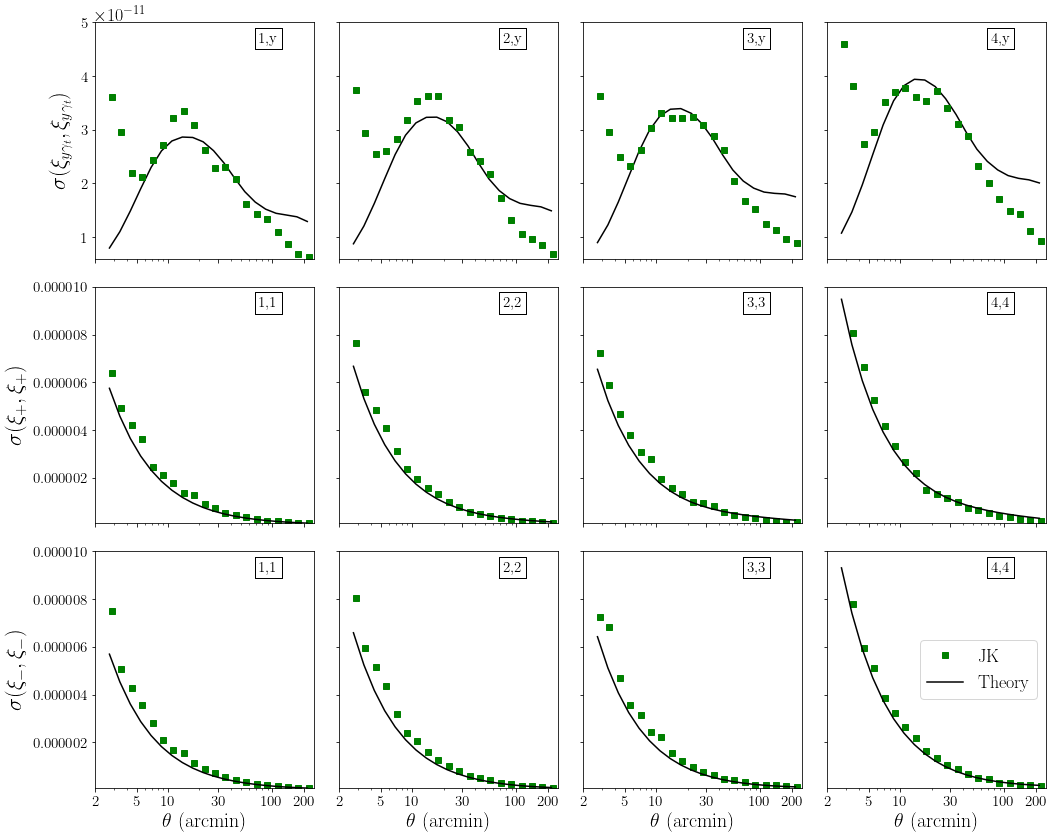

In [29]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_Planck.fits')

fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_planck_wcov_halfnl.pk','rb'))  
theta_arr = DV.fftcovtot_dict['kk_kk']['theta']

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(3,4, figsize = (15,12),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(3):    
    for j2 in range(4):
        
        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]

        bin1m = df['xim'].data['BIN1']
        bin2m = df['xim'].data['BIN2']
        ind_selm = np.where((bin1m == bins1[j2]) & (bin2m == bins2[j2]))[0]
        if len(ind_selm) == 0:
            ind_selm = np.where((bin1m == bins2[j2]) & (bin2m == bins1[j2]))[0]    
        
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]
        
        
        if j1 == 0:
            cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')

            yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:,400:][ind_sely,:][:,ind_sely]))
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
            ax[j1,j2].set_ylim(6e-12,5e-11)
            
            
            
        if j1 == 1:
            yk_th_g = df['xip'].data['ANG'][ind_sel]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]))


            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            

            cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')

            
            
#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
            ax[j1,j2].set_ylim(1e-7,1e-5)

        if j1 == 2:
            yk_th_g = df['xim'].data['ANG'][ind_selm]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[200:400,200:400][ind_selm,:][:,ind_selm]))


            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            

            cov_kk_binj2 = DV.fftcovtot_dict['kkm_kkm']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')

            
            
#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
            ax[j1,j2].set_ylim(1e-7,1e-5)




#         ax[j1,j2].set_ylim(0.5,4.2)
        ax[j1,j2].axhline(1.0,ls='--',color='k')    
#             
        ax[j1,j2].set_xscale('log')
#         if j1 == 1:
#         ax[j1,j2].set_yscale('log')
        
        if j1 == 2:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[2,3].legend(fontsize=18,loc='center right')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')









In [28]:
theta_arr[ind_inth]


array([  2.73069926,   3.4377467 ,   4.32786668,   5.44846135,
         6.85920645,   8.63522931,  10.87110962,  13.68591617,
        17.22954766,  21.6907154 ,  27.30699284,  34.37746723,
        43.27866711,  54.48461386,  68.59206498,  86.35229372,
       108.711097  , 136.85916266, 172.29547783, 216.90715553])

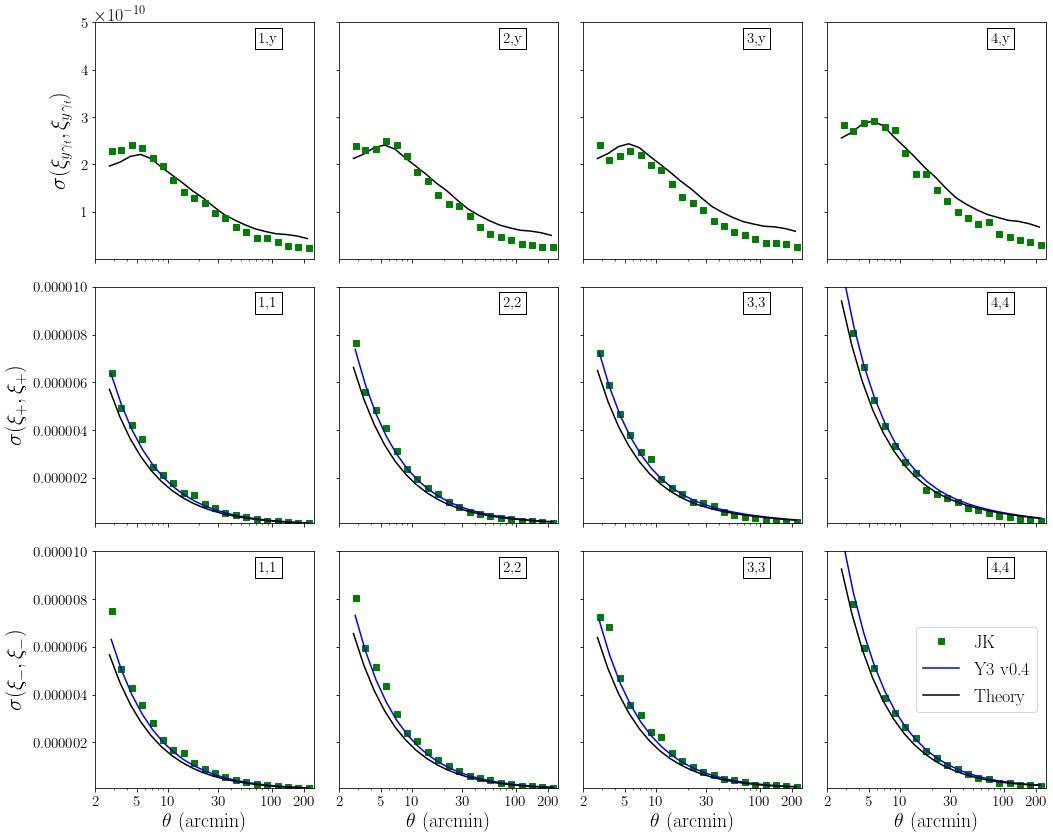

In [30]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_ACT.fits')

fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wcov_yytotnew_halfnl.pk','rb'))  
theta_arr = DV.fftcovtot_dict['kk_kk']['theta']

from astropy.io import fits
desy3 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(3,4, figsize = (15,12),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(3):    
    for j2 in range(4):
        
        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]

        bin1m = df['xim'].data['BIN1']
        bin2m = df['xim'].data['BIN2']
        ind_selm = np.where((bin1m == bins1[j2]) & (bin2m == bins2[j2]))[0]
        if len(ind_selm) == 0:
            ind_selm = np.where((bin1m == bins2[j2]) & (bin2m == bins1[j2]))[0]        
        
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]
        
        bin1py3 = desy3['xip'].data['BIN1']
        bin2py3 = desy1['xip'].data['BIN2']
        ind_selpy3 = np.where((bin1py3 == bins1[j2]) & (bin2py3 == bins2[j2]))[0]
        if len(ind_selpy3) == 0:
            ind_selpy3 = np.where((bin1py3 == bins2[j2]) & (bin2py3 == bins1[j2]))[0]
            
        bin1my3 = desy3['xip'].data['BIN1']
        bin2my3 = desy3['xip'].data['BIN2']
        ind_selmy3 = np.where((bin1my3 == bins1[j2]) & (bin2my3 == bins2[j2]))[0]
        if len(ind_selmy3) == 0:
            ind_selmy3 = np.where((bin1my3 == bins2[j2]) & (bin2my3 == bins1[j2]))[0]


        if j1 == 0:
            cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')

            yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:,400:][ind_sely,:][:,ind_sely]))
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
            ax[j1,j2].set_ylim(1e-12,5e-10)
            
            
            
        if j1 == 1:
            yk_th_g = df['xip'].data['ANG'][ind_sel]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]))
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            y3_th_g = desy3['xip'].data['ANG'][ind_selpy3]
            y3_err = np.sqrt(np.diag(desy3['COVMAT'].data[0:200,0:200][ind_selpy3,:][:,ind_selpy3]))
            ax[j1,j2].plot(y3_th_g, y3_err, ls='-',marker='',color='blue',label='Y3 v0.4')

            cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')
            
            ax[j1,j2].set_ylim(1e-7,1e-5)

        if j1 == 2:
            yk_th_g = df['xim'].data['ANG'][ind_selm]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[200:400,200:400][ind_selm,:][:,ind_selm]))
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            y3_th_g = desy3['xim'].data['ANG'][ind_selmy3]
            y3_err = np.sqrt(np.diag(desy3['COVMAT'].data[200:400,200:400][ind_selmy3,:][:,ind_selmy3]))
            ax[j1,j2].plot(y3_th_g, y3_err, ls='-',marker='',color='blue',label='Y3 v0.4')

            cov_kk_binj2 = DV.fftcovtot_dict['kkm_kkm']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')
            
            ax[j1,j2].set_ylim(1e-7,1e-5)




#         ax[j1,j2].set_ylim(0.5,4.2)
        ax[j1,j2].axhline(1.0,ls='--',color='k')    
#             
        ax[j1,j2].set_xscale('log')
#         if j1 == 1:
#         ax[j1,j2].set_yscale('log')
        
        if j1 == 2:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[2,3].legend(fontsize=18,loc='center right')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)


pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')







No handles with labels found to put in legend.


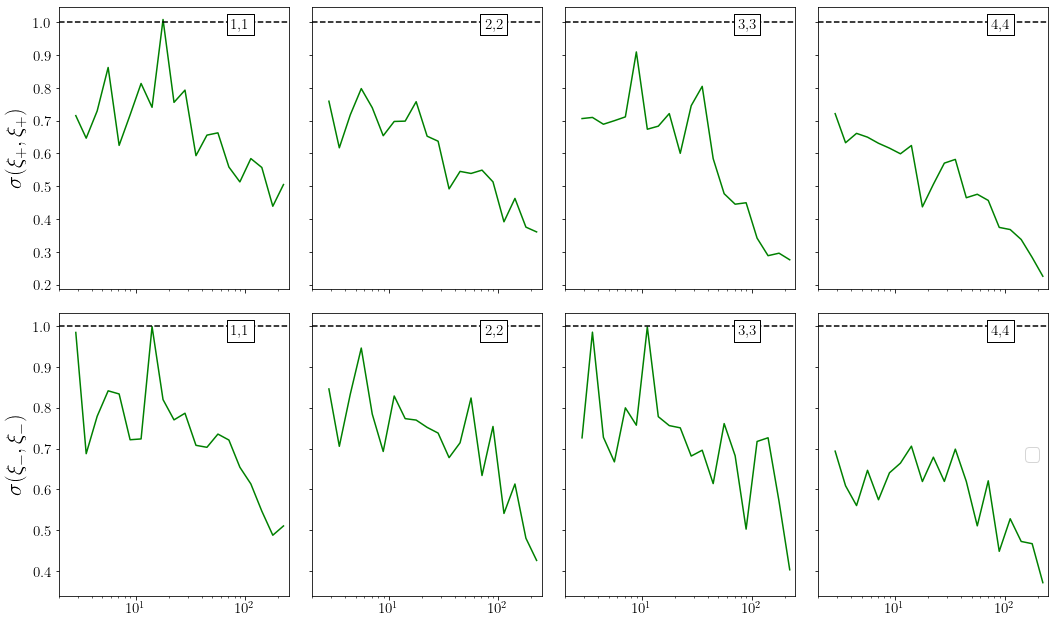

In [26]:
import pickle as pk
import numpy as np
import scipy.interpolate as interpolate
# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_Planck.fits')

fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_planck_wcov.pk','rb'))  
theta_arr = DV.fftcovtot_dict['kk_kk']['theta']

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(2,4, figsize = (15,9),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]

        bin1m = df['xim'].data['BIN1']
        bin2m = df['xim'].data['BIN2']
        ind_selm = np.where((bin1m == bins1[j2]) & (bin2m == bins2[j2]))[0]
        if len(ind_selm) == 0:
            ind_selm = np.where((bin1m == bins2[j2]) & (bin2m == bins1[j2]))[0]
        
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]
        
#         if j1 == 0:
#             cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(j2+1) + '_' + str(0) + '_' + str(j2+1) + '_' + str(0)]
#             sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
#             ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')

#             yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
#             yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:,400:][ind_sely,:][:,ind_sely]))
            
#             ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
#             ax[j1,j2].set_ylim(6e-12,5e-11)
            
            
            
        if j1 == 0:
            yk_th_g = df['xip'].data['ANG'][ind_sel]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]))


#             ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
            
            sig_th_interp = interpolate.interp1d(np.log(theta_arr[ind_inth]),np.log(sig_kk_binj2[ind_inth]),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')


            
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')
        
            
            
#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
#             ax[j1,j2].set_ylim(1e-7,1e-5)

        if j1 == 1:
            yk_th_g = df['xim'].data['ANG'][ind_selm]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[200:400,200:400][ind_selm,:][:,ind_selm]))


#             ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            

            cov_kk_binj2 = DV.fftcovtot_dict['kkm_kkm']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
            sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
            ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
#             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')
            sig_th_interp = interpolate.interp1d(np.log(theta_arr[ind_inth]),np.log(sig_kk_binj2[ind_inth]),fill_value='extrapolate')  
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')



            
            
#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
#             ax[j1,j2].set_ylim(1e-7,1e-5)




#         ax[j1,j2].set_ylim(0.5,4.2)
        ax[j1,j2].axhline(1.0,ls='--',color='k')    
#             
        ax[j1,j2].set_xscale('log')
#         if j1 == 1:
#         ax[j1,j2].set_yscale('log')
        
        if j1 == 2:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
# ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[1,3].legend(fontsize=18,loc='center right')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)
pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')










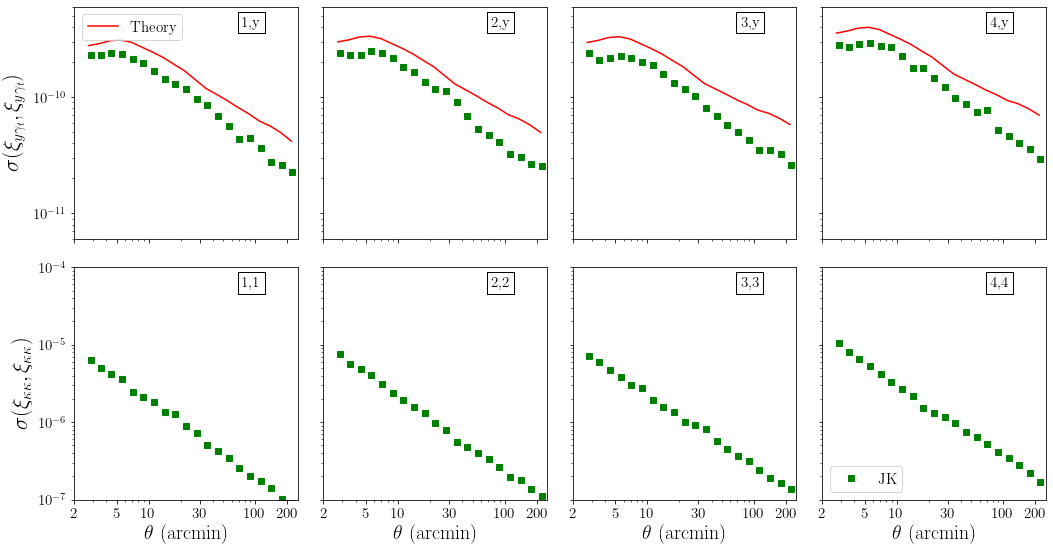

In [22]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_ACT.fits')

fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'

fnames = [
    'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_1_12500.pk',
#     'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_20_12500.pk',
#     'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_20_6000.pk'    
]
colors = ['r','b','k']

from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([2,2,2,2])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']


for jfn in range(len(fnames)):
    DV = dill.load(open(fdir + fnames[jfn],'rb'))  
    theta_arr = DV.fftcovtot_dict['gty_gty']['theta']

    for j1 in range(2):    
        for j2 in range(4):

            bin1 = df['xip'].data['BIN1']
            bin2 = df['xip'].data['BIN2']
            ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
            if len(ind_sel) == 0:
                ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
            ind_sel1 = np.where((bin1 == bins1[j2]))[0]
            ind_sel2 = np.where((bin2 == bins2[j2]))[0]


            bin1y = df['compton_shear'].data['BIN1']
            bin2y = df['compton_shear'].data['BIN2']
            ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]




            if j1 == 0:
                cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(bins1[j2]) + '_' + str(0) + '_' + str(bins2[j2]) + '_' + str(0)]  
                sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
                ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
                ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color=colors[jfn],label='Theory')

                yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
                yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:,400:][ind_sely,:][:,ind_sely]))

                ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
                ax[j1,j2].set_ylim(6e-12,6e-10)



            if j1 == 1:
                yk_th_g = df['xip'].data['ANG'][ind_sel]
                yk_err = np.sqrt(np.diag(df['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]))


                ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')


        #             cov_kk_binj2 = DV.fftcovtot_dict['kk_kk']['bin_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1) + '_' + str(j2+1)]
        #             sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
        #             ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
        #             ax[j1,j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color='k',label='Theory')



        #             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y3 v0.4')
                ax[j1,j2].set_ylim(1e-7,1e-4)



        #         ax[j1,j2].set_ylim(0.5,4.2)
            ax[j1,j2].axhline(1.0,ls='--',color='k')    
        #             
            ax[j1,j2].set_xscale('log')
        #         if j1 == 1:
        #             ax[j1,j2].set_yscale('log')
            ax[j1,j2].set_yscale('log')
            if j1 == 1:
                ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
                ticks  = np.array([2,5,10,30,100,200])
                labels_bottom = ticks
                ax[0,j2].set_xticks(ticks)
                ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
                ax[1,j2].set_xticks(ticks)
                ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)

            ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
            ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
        #         ax[0,0].legend(fontsize = 18, frameon = False)
            ax[j1,j2].set_xlim((2,250))


        #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
            ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
            ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        #         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


            jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')










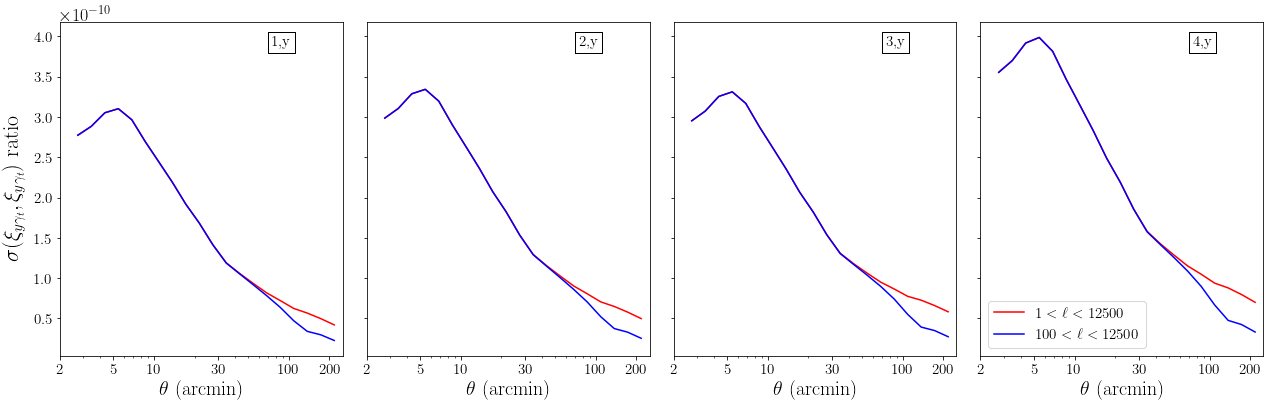

In [15]:
# from twobessel import *
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')

df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_ACT.fits')

fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'

fnames = [
    'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_1_12500.pk',
    'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_100_6000.pk',
#     'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty_wGcov_yytotnew_20_6000.pk'    
]
colors = ['r','b','k']
labels = [
    r'$1 < \ell < 12500$',
    r'$100 < \ell < 12500$',
    r'$20 < \ell < 6000$'    
]


# df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_Planck.fits')

# fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_planck_wcov.pk']
# labels = [
#     r'$1 < \ell < 12500$',
#     r'$20 < \ell < 12500$',
#     r'$20 < \ell < 6000$'    
# ]



# DV = dill.load(open(fdir + 'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty_planck_wcov.pk','rb'))  
# theta_arr = DV.fftcovtot_dict['kk_kk']['theta']



from astropy.io import fits
desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([2,2,2,2])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(1,4, figsize = (18,6),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for j2 in range(4):

    for jfn in range(len(fnames)):
        DV = dill.load(open(fdir + fnames[jfn],'rb'))  
        theta_arr = DV.fftcovtot_dict['gty_gty']['theta']

        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        ind_sel1 = np.where((bin1 == bins1[j2]))[0]
        ind_sel2 = np.where((bin2 == bins2[j2]))[0]


        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]




        cov_kk_binj2 = DV.fftcovtot_dict['gty_gty']['bin_' + str(bins1[j2]) + '_' + str(0) + '_' + str(bins2[j2]) + '_' + str(0)]  
        sig_kk_binj2 = np.sqrt(np.diag(cov_kk_binj2))
        ind_inth = np.where((theta_arr > 2.5) &  (theta_arr < 250.))[0]
        
        if jfn == 0:
            sig_th_interp = interpolate.interp1d(theta_arr, sig_kk_binj2,fill_value='extrapolate')
            yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
            yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:,400:][ind_sely,:][:,ind_sely]))

#             ax[j2].plot(yk_th_g, yk_err/(sig_th_interp(yk_th_g)), ls='',marker='s',color='green')


        
#         ax[j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth]/(sig_th_interp(theta_arr[ind_inth])), ls='-',color=colors[jfn],label=labels[jfn])  
        ax[j2].plot(theta_arr[ind_inth], sig_kk_binj2[ind_inth], ls='-',color=colors[jfn],label=labels[jfn])  

#         ax[j2].set_ylim(6e-12,6e-10)




#         ax[j2].set_ylim(0.99,1.005)
#         ax[j2].axhline(1.0,ls='--',color='k')    
    #             
        ax[j2].set_xscale('log')
    #         if j1 == 1:
    #             ax[j1,j2].set_yscale('log')
#         ax[j2].set_yscale('log')
        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([2,5,10,30,100,200])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
    #         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2,250))


    #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
    #         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ratio', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
# ax[0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')











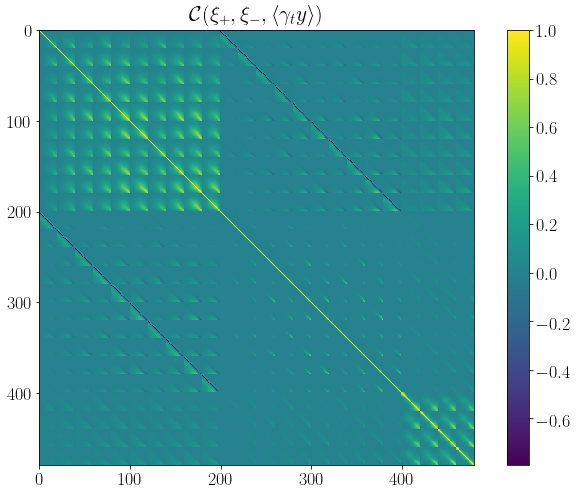

In [31]:
df = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_ACT_theorycov_theorydv.fits')
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(get_corr((df['COVMAT'].data)))
pl.colorbar()
pl.title(r'$\mathcal{C}(\xi_{+},\xi_{-},\langle \gamma_t y \rangle)$')
pl.savefig('cov_total.pdf')






In [28]:
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl','rb'),encoding='latin1')

df['YY_y3']['xi']



array([2.37660321e-12, 2.42391832e-12, 2.04458337e-12, 1.77022473e-12,
       1.41924250e-12, 1.02277259e-12, 7.00307380e-13, 4.43308721e-13,
       3.00710733e-13, 2.18772635e-13, 1.61918014e-13, 1.20704346e-13,
       9.36983917e-14, 7.68311974e-14, 5.98287352e-14, 4.84454488e-14,
       3.93148510e-14, 3.72432915e-14, 3.38001440e-14, 2.52565070e-14])

In [29]:
df['YY_y1']['xi']




array([2.02455150e-12, 2.45696799e-12, 1.77013531e-12, 1.75087678e-12,
       1.43103803e-12, 1.06882910e-12, 8.00841623e-13, 5.38091079e-13,
       3.85210759e-13, 2.86118779e-13, 2.10047299e-13, 1.55256518e-13,
       1.20271514e-13, 9.90793582e-14, 7.92273704e-14, 6.43107245e-14,
       5.31915266e-14, 5.30119299e-14, 4.87675339e-14, 4.26405874e-14])

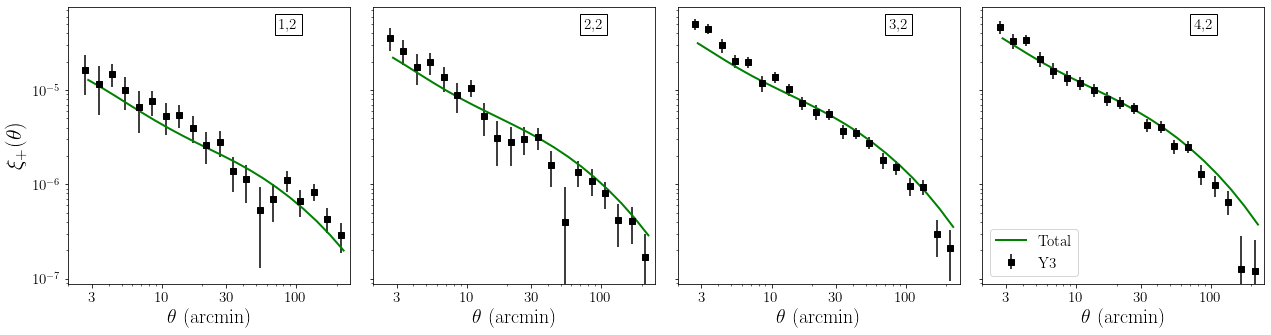

In [16]:
ntheta = len(df['shearshear_y3']['1_1']['theta'])
bins_array = [1,2,3,4]
# nbins = len([*df['shearshear_y3'].keys()])

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')
jc = 0
nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([2,2,2,2])

texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))


# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
# theta_array = DV.xi_result_dict['kk']['theta']
for j2 in range(4):
    
    
    bin1 = desy1['xip'].data['BIN1']
    bin2 = desy1['xip'].data['BIN2']

    ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
    if len(ind_sel) == 0:
        ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]


    
#     sel_ind = np.where((bin1_xip == j2+1) & (bin2_xip == j2+1))[0]

#     Cl_j1_1h = DV.xi_result_dict['kk'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['kk'][bin_str]['2h']
    try:
        bin_str = 'bin_' + str(bins1[j2]) + '_' + str(bins2[j2])
        Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
    except:
        bin_str = 'bin_' + str(bins2[j2]) + '_' + str(bins1[j2])
        Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
#     Cl_j1_tot2 = DV.xi_result_dict['kk'][bin_str]['tot2']

#     ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h Linear')
#     ax[j2].errorbar(theta_array, Cl_j1_1h + Cl_j1_2h, linestyle=':', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='green',label='Total')  
#     ax[j2].errorbar(theta_array, DV.xi_result_dict['kk'][bin_str]['int'], linestyle='--', marker='',lw = 2, color ='blue',label='Intrinsic')  



#     ax[j2].errorbar(xip_ang[sel_ind], xip_csf[sel_ind], linestyle='-', marker='',lw = 2, color ='green',label='Cosmosis')  



    yk_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xip']
    yk_th_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180./np.pi
    yk_err = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['err_p']
    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Y3')

#     yk_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['xip']
#     yk_th_g = df['shearshear_y1'][str(j2) + '_' + str(j2)]['theta'] * 180./np.pi
#     yk_err = df['shearshear_y1'][str(j2) + '_' + str(j2)]['err_p']            
#     ax[j2].errorbar(1.05*yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
#     ax[j2].set_ylim(1e-11,1e-9)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
    ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')







In [24]:
twoptf = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory_25_6_20.pk','rb'))  
twoptf.keys()



dict_keys(['xcoord_all', 'mean', 'cov_total'])

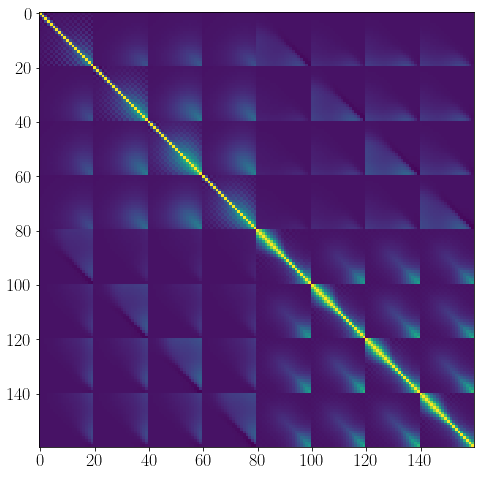

In [27]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(get_corr((twoptf['cov_total'])))



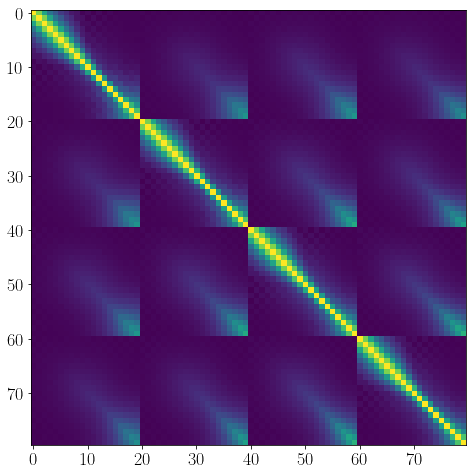

In [26]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(get_corr((twoptf['cov_total'][80:,:][:,80:])))






Text(0.5, 1.0, '$\\mathcal{C}(\\langle \\gamma_t y \\rangle,\\langle \\gamma_t y \\rangle)$')

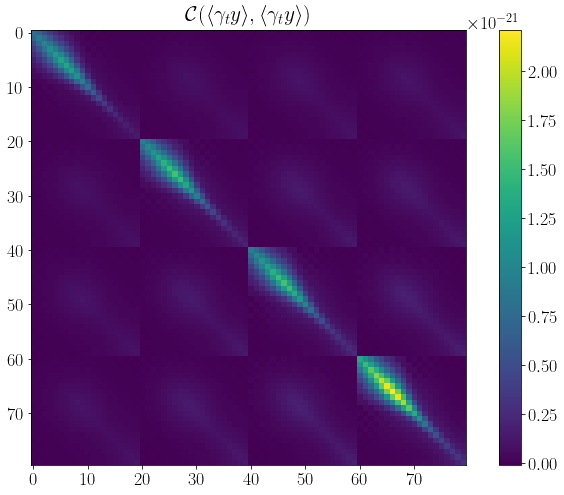

In [74]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr

pl.figure( figsize = (12,8))
# pl.imshow(np.log(np.abs(twoptf['cov_total'])))
pl.imshow(((twoptf['cov_total'][80:,:][:,80:])))
pl.colorbar()
pl.title(r'$\mathcal{C}(\langle \gamma_t y \rangle,\langle \gamma_t y \rangle)$')






In [6]:
import matplotlib
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  if __name__ == '__main__':


In [7]:
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz

# def get_param_names(filename):
#     with open(filename,"r") as fi:
#         param_names = np.array((fi.readline()[1:].split())[:-4])
#     print param_names
#     return param_names


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8


def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)


s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97}    
stat_vars = ['cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8','cosmological_parameters--s8']
def get_mean_std_tension(fname, param_names=stat_vars, truth_dict=marker_dict):
    sf_name = open(fname, 'r')
    lines_all = sf_name.readlines()
    lines = lines_all[3:]
    mean_std = {}
    for j1 in range(len(param_names)):
        for i1 in range(len(lines)):
            first_line = lines[i1]
            first_line_split = first_line.split()
            sec_var = first_line_split[0]
            if sec_var == param_names[j1]:
                mean_std[sec_var] = np.array([float(first_line_split[1]),float(first_line_split[2])])
    out_dic = {}
    for param in param_names:
        mean, std = mean_std[param][0],mean_std[param][1]
        tension = np.abs(mean - truth_dict[param])/std
        out_dic[param] = tension
    
    return mean_std,out_dic

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)




[[ 7.73757218e-01  4.84898719e-01  2.01025263e+01  4.70721489e+00
  -5.08759634e+00 -1.04010114e+02 -1.09097711e+02  1.42702470e-03]]
Removed no burn in
nsamp  =  462
data shape =  (462, 4)
weights shape =  (462,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$\\beta(A)$']
[[ 7.82239891e-01  5.90495751e-02  1.02710575e+01  4.01165948e+00
  -5.08759634e+00 -1.77259856e+02 -1.82347453e+02  1.45135296e-03]]
Removed no burn in
nsamp  =  597
data shape =  (597, 4)
weights shape =  (597,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$\\beta(A)$']


<Figure size 1152x864 with 0 Axes>

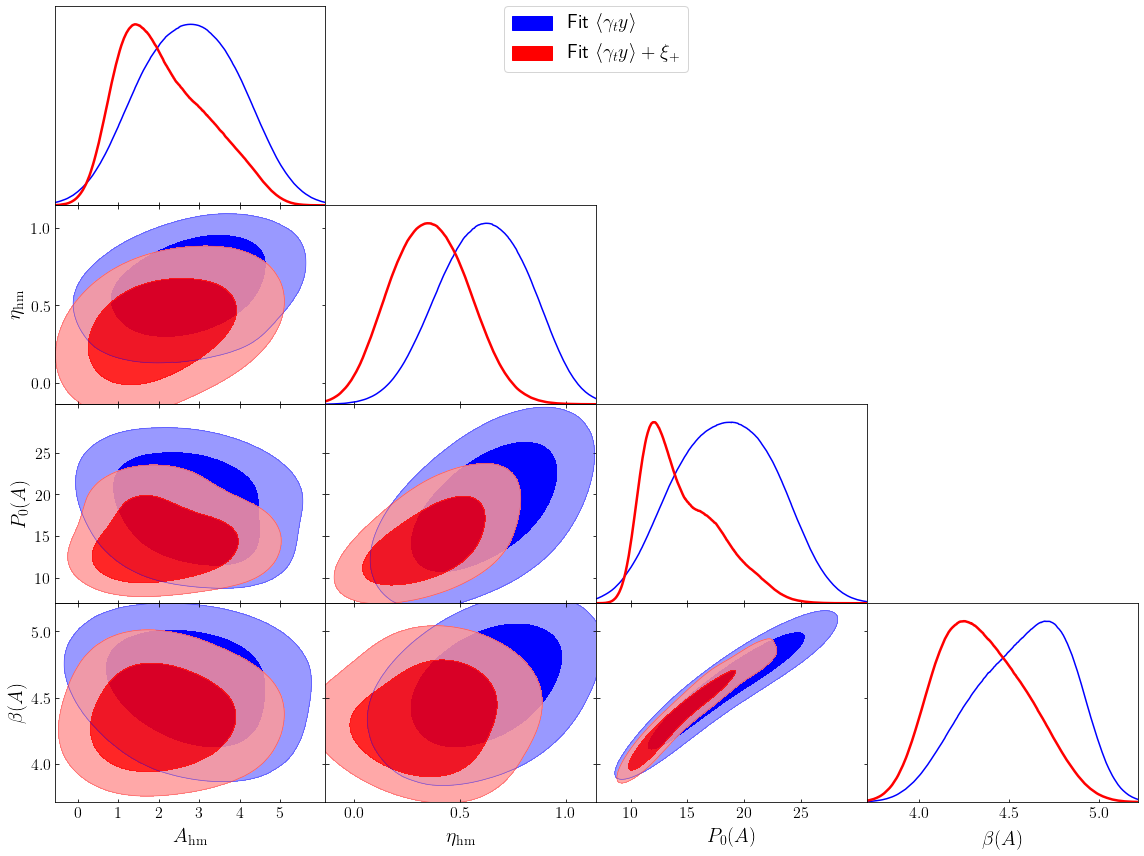

In [3]:
filename_list = ['/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_gtyonly_corr.txt',  
                 '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_kkgtyonly_corr.txt'
]     
legend_labels = ['Fit ' +  r'$\langle \gamma_t y \rangle$','Fit ' +  r'$\langle \gamma_t y \rangle + \xi_{+}$']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    nsample = get_nsample(filename)
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-3]
    ind_max = np.where(likef == np.amax(likef))[0]
    print(data[ind_max,:])
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =16)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,True], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






[[ 7.63050085e-01  8.18766016e-02  1.22397760e+01  4.14369398e+00
  -1.13051185e+00  3.81485969e-01 -7.86018506e+00 -1.77365630e+02
  -1.85225815e+02  1.45909204e-03]]
Removed no burn in
nsamp  =  719
data shape =  (719, 6)
weights shape =  (719,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0'
 'theory_yx--p0-alpha_z--0' 'theory_yx--beta-alpha_z--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$\\beta(A)$'
 '$P_0(\\alpha_z)$' '$\\beta(\\alpha_z)$']
[[ 5.41759718e-01  1.50856392e-01  1.47248977e+01 -9.78098915e-01
  -6.29156914e+00 -1.77621342e+02 -1.83912911e+02  1.44685982e-03]]
Removed no burn in
nsamp  =  606
data shape =  (606, 4)
weights shape =  (606,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--p0-alpha_z--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$P_0(\\alpha_z)$']
[[ 7.82239891e-0

<Figure size 1152x864 with 0 Axes>

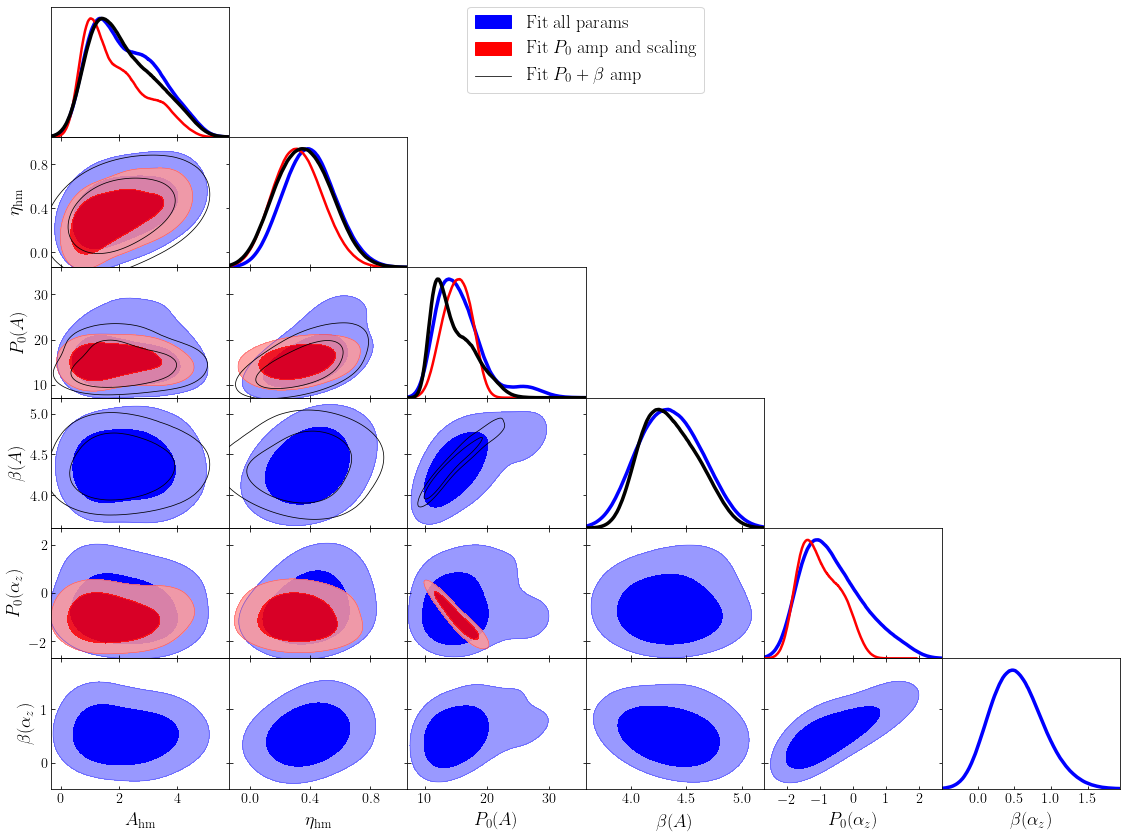

In [6]:
filename_list = ['/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0betaaz2_narrow_kkgtyonly_corr.txt',  
                 '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0az_narrow_kkgtyonly_corr.txt',   
                 '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_kkgtyonly_corr.txt'
]     
legend_labels = ['Fit all params','Fit ' + r'$P_0$' + ' amp and scaling','Fit ' + r'$P_0 + \beta$' + ' amp']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    nsample = get_nsample(filename)
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-3]
    ind_max = np.where(likef == np.amax(likef))[0]
    print(data[ind_max,:])
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =16)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':3.5,'color':'black'}],contour_lws=[3.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')







[[ 5.99969318e-01  2.94258836e-02  1.04113960e+01  4.10940367e+00
  -2.66087689e-01  1.57196990e+00 -7.57250299e+00 -1.55396221e-01
  -7.72789921e+00  1.45479615e-03]]
Removed no burn in
nsamp  =  636
data shape =  (636, 6)
weights shape =  (636,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0'
 'theory_yx--alpha_p_high--0' 'theory_yx--alpha_p_low--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$' '$\\beta(A)$'
 '$\\alpha^{\\rm high}_{\\rm p}$' '$\\alpha^{\\rm low}_{\\rm p}$']
[[ 1.25693245e+00  1.55205568e-01  1.63864175e+01  4.19170179e+00
   2.13541956e-01 -3.95625394e-02 -7.57250299e+00 -1.51650844e-01
  -7.72415383e+00  1.42544174e-03]]
Removed no burn in
nsamp  =  525
data shape =  (525, 6)
weights shape =  (525,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0'
 'theory_yx--alpha_p_high--0' 'theory_yx--alpha_p

<Figure size 1152x864 with 0 Axes>

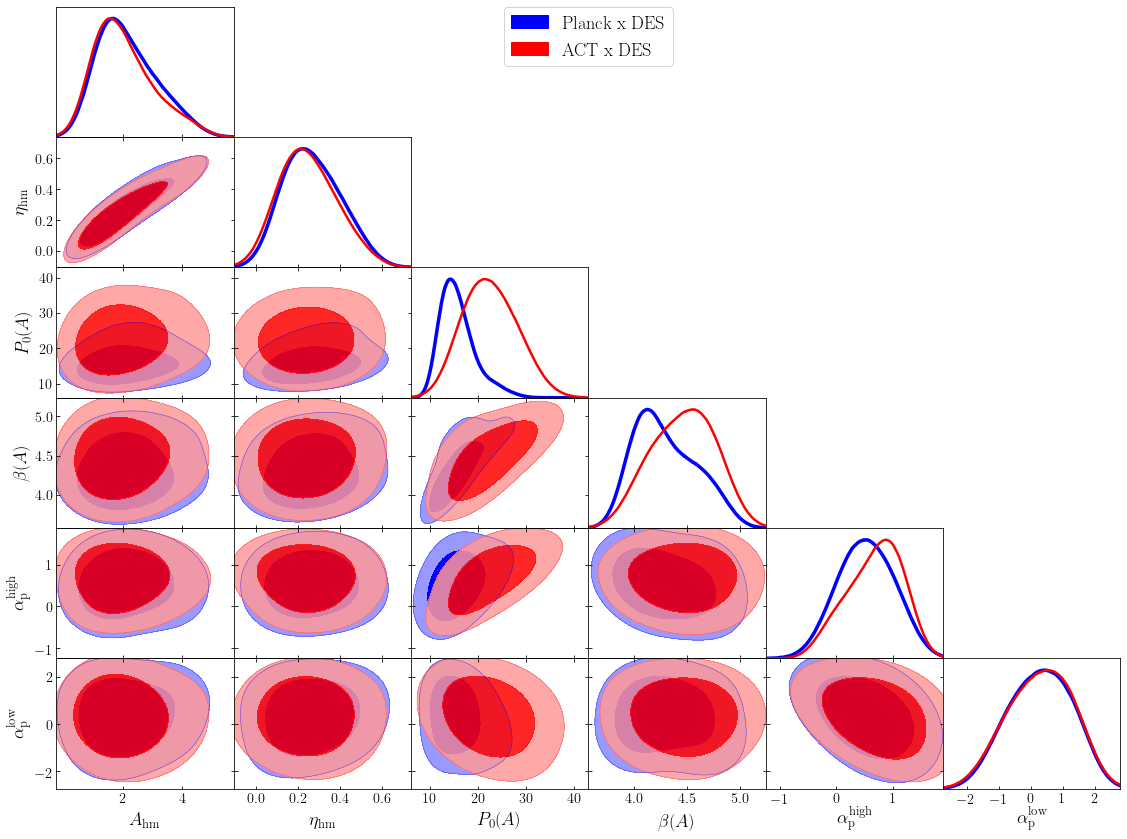

In [9]:
filename_list = ['/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_broken_narrow_ximgty.txt',  
                 '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_actxdesy3_grid_v0p4_P0beta_broken_narrow_ximgty.txt',   
#                  '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_kkgtyonly_corr.txt'
]     
legend_labels = ['Planck x DES','ACT x DES','Fit ' + r'$P_0 + \beta$' + ' amp']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--alpha_p_high--0':r'$\alpha^{\rm high}_{\rm p}$', 'theory_yx--alpha_p_low--0':r'$\alpha^{\rm low}_{\rm p}$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    nsample = get_nsample(filename)
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-3]
    ind_max = np.where(likef == np.amax(likef))[0]
    print(data[ind_max,:])
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =16)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':3.5,'color':'black'}],contour_lws=[3.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')








[[ 4.03048179e-01  7.81128801e-02  9.71812401e+00  5.55106488e-01
   4.79730153e+00  6.49553169e-01 -1.26576898e+00 -8.51251024e+00
  -6.32975332e+02 -6.41487842e+02  7.31415799e-04]]
Removed no burn in
nsamp  =  1585
data shape =  (1585, 7)
weights shape =  (1585,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--p0-alpha_m--0'
 'theory_yx--beta-a_m--0' 'theory_yx--alpha_p_high--0'
 'theory_yx--alpha_p_low--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$P_0(A)$'
 '$\\alpha^{\\rm high}_{\\rm p}$' '$\\beta(A)$'
 '$\\alpha^{\\rm mid}_{\\rm p}$' '$\\alpha^{\\rm low}_{\\rm p}$']
[[ 4.28278339e-01  1.33687170e-01  8.08166682e+00  7.84855835e-01
   5.10620979e+00  5.61972553e-01  1.73693161e+00 -8.51251024e+00
  -5.29260595e+02 -5.37773105e+02  7.38174504e-04]]
Removed no burn in
nsamp  =  1531
data shape =  (1531, 7)
weights shape =  (1531,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'

<Figure size 1152x864 with 0 Axes>

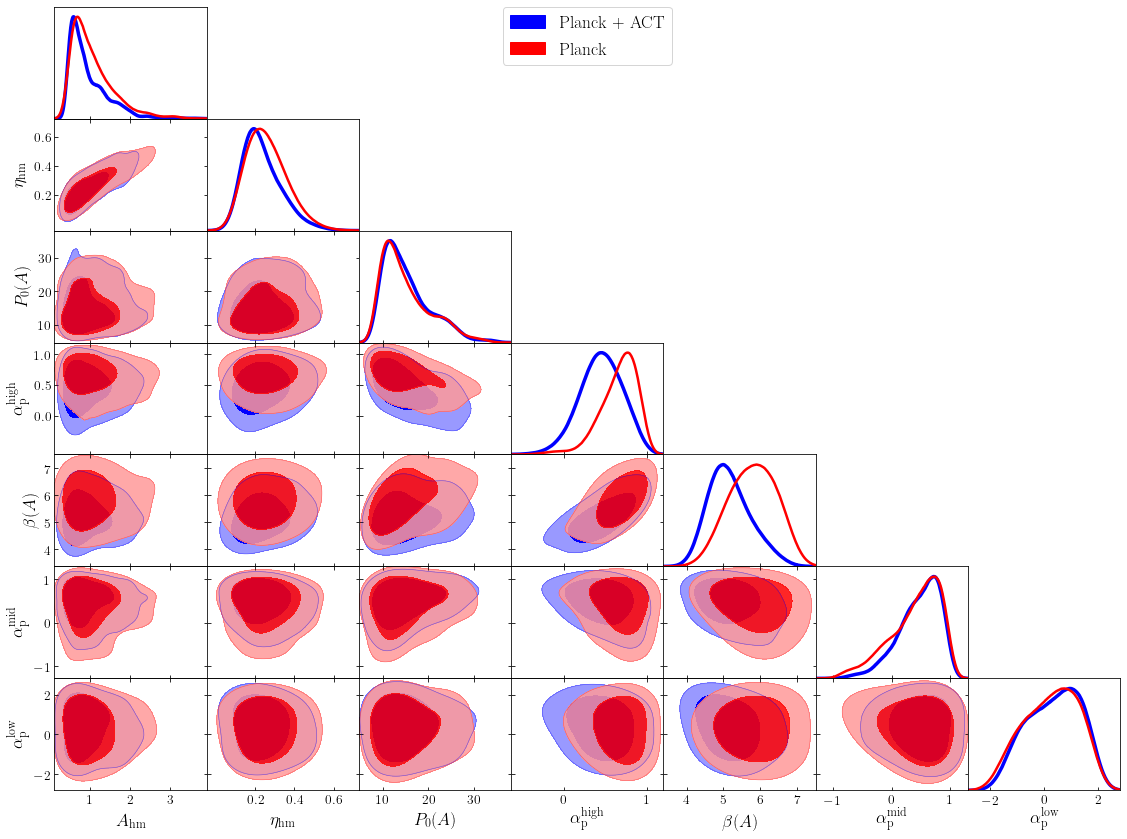

In [8]:
filename_list = ['/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckpactxdesy3_v0p4_broken_wide.txt',  
                 '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_v0p4_broken_wide.txt',   
#                  '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_grid_v0p4_P0beta_narrow_kkgtyonly_corr.txt'
]     
legend_labels = ['Planck + ACT','Planck','Fit ' + r'$P_0 + \beta$' + ' amp']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--alpha_p_high--0':r'$\alpha^{\rm mid}_{\rm p}$', 'theory_yx--alpha_p_low--0':r'$\alpha^{\rm low}_{\rm p}$',
                   'theory_yx--p0-alpha_m--0':r'$\alpha^{\rm high}_{\rm p}$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    nsample = get_nsample(filename)
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-3]
    ind_max = np.where(likef == np.amax(likef))[0]
    print(data[ind_max,:])
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =16)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':3.5,'color':'black'}],contour_lws=[3.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

g.export(fname = 'compare_pressure_HM_data.pdf')









In [15]:
fname = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckxdesy3_gridtrue_v0p4_P0beta_only.txt'
df = np.loadtxt(fname)

p1 = df[:,0]
p2 = df[:,1]
post = df[:,-1]





In [29]:
ind_sel = np.where((p1 > 16.2) & (p1 < 16.4))[0]
print(p2[ind_sel])
ind_sel2 = np.where(p2[ind_sel] > 4.35)[0][0]
post[ind_sel][ind_sel2]


[4.         4.01010101 4.02020202 4.03030303 4.04040404 4.05050505
 4.06060606 4.07070707 4.08080808 4.09090909 4.1010101  4.11111111
 4.12121212 4.13131313 4.14141414 4.15151515 4.16161616 4.17171717
 4.18181818 4.19191919 4.2020202  4.21212121 4.22222222 4.23232323
 4.24242424 4.25252525 4.26262626 4.27272727 4.28282828 4.29292929
 4.3030303  4.31313131 4.32323232 4.33333333 4.34343434 4.35353535
 4.36363636 4.37373737 4.38383838 4.39393939 4.4040404  4.41414141
 4.42424242 4.43434343 4.44444444 4.45454545 4.46464646 4.47474747
 4.48484848 4.49494949 4.50505051 4.51515152 4.52525253 4.53535354
 4.54545455 4.55555556 4.56565657 4.57575758 4.58585859 4.5959596
 4.60606061 4.61616162 4.62626263 4.63636364 4.64646465 4.65656566
 4.66666667 4.67676768 4.68686869 4.6969697  4.70707071 4.71717172
 4.72727273 4.73737374 4.74747475 4.75757576 4.76767677 4.77777778
 4.78787879 4.7979798  4.80808081 4.81818182 4.82828283 4.83838384
 4.84848485 4.85858586 4.86868687 4.87878788 4.88888889 4.89898

-291.9595092586844

In [30]:
p1[ind_sel][ind_sel2], p2[ind_sel][ind_sel2], post[ind_sel][ind_sel2]




(16.363636363636367, 4.353535353535354, -291.9595092586844)

In [45]:
ind_m = np.where(post == np.amax(post))[0]
print(p1[ind_m], p2[ind_m])




[1.71414141] [2.34343434]


In [48]:
np.amin(-2.*post/80.)


3.5643850486262814

(3.0, 6.0)

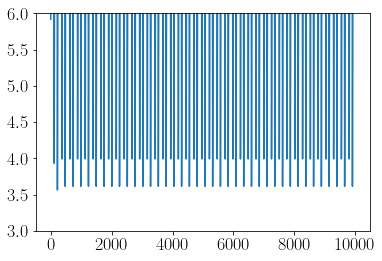

In [50]:
pl.figure()
pl.plot(-2.*post/80.)
# pl.yscale('log')
pl.ylim(3.0,6.0)






In [10]:
post_arr = np.loadtxt(filename)[-nsample:,-3]



In [11]:
np.amin(post_arr)




-105.15301282276585

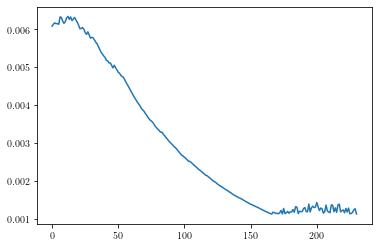

In [6]:
pl.figure()
pl.plot(post_arr)




In [36]:
np.amax(post_arr)


-1375.803843209699

In [37]:
a1 = np.arange(100)
a1[2::10]


array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])

In [40]:
np.loadtxt(filename)[-nsample:,-1][3::250]



array([-196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648176,
       -196.15648176, -196.15648176, -196.15648176, -196.15648

In [25]:
(np.loadtxt(filename)[-nsample:,2][6::250])




array([21.83550299, 21.83550299, 21.83550299, 21.83550299, 21.83550299,
       21.83550299, 21.83550299, 21.83550299, 21.83550299, 24.27313135,
       24.27313135, 24.27313135, 24.27313135, 24.27313135, 24.27313135,
       24.27313135, 24.27313135, 24.27313135, 24.27313135, 24.27313135,
       24.27313135, 24.27313135, 24.27313135, 24.14328863, 24.14328863,
       24.14328863, 24.14328863, 37.26403154, 37.26403154, 37.26403154,
       37.26403154, 37.26403154, 37.26403154, 35.12137506, 35.12137506,
       35.12137506, 35.12137506, 35.12137506, 35.35464798, 35.35464798,
       35.35464798, 38.83346837, 42.54988277, 42.54988277, 28.56438745,
       28.56438745, 28.56438745, 28.56438745, 27.73183827, 27.73183827,
       27.73183827, 27.73183827, 27.73183827, 23.40080101, 23.22293149,
       23.22293149, 23.22293149, 21.04893752, 21.04893752, 20.20793402,
       20.25147406, 23.05780746, 23.05780746, 23.05780746, 23.05780746,
       23.05780746, 23.05780746, 23.05780746, 23.05780746, 23.05

In [27]:
ind_big = np.where(np.loadtxt(filename)[-nsample:,2] > 45)[0][0]
print(np.loadtxt(filename)[-nsample:,:][ind_big,:])



[   4.58480833    0.59263929   64.26787543    1.74725791   -0.65899117
    1.62610023  -12.31940133 -202.43086862]


In [61]:
np.where(np.loadtxt(filename)[-nsample:,-5] == np.amax(np.loadtxt(filename)[-nsample:,-5]))[0]





array([15141, 15391, 15641, 15891, 16141, 16391])

In [56]:
np.loadtxt(filename)[-nsample:,-5][253]


4.361167723983798

In [9]:
fr0_all = [
    '1x2pt_fiducial_scales_3x2pt_0.5_8_6_v0.4.ini_v0.40_fiducial.fits_wcdm_v0_r0get_wit8.pkl',
    '1x2pt_fiducial_scales_3x2pt_0.5_8_6_v0.4.ini_v0.40_fiducial.fits_wcdm_v0_r0get_wit8_cub2_al_10_8.pkl',
    '1x2pt_fiducial_scales_3x2pt_0.5_8_6_v0.4.ini_v0.40_fiducial.fits_wcdm_v0_r0get_wit8_cub3.pkl'    
]

text = ['Quadractic Model' + '\n' + r'$\log{(\mathcal{Z}_{\rm IS}) - \log{(\mathcal{Z}_{\rm no-IS})} = -0.9966$',
       'Cubic-2 Model' + '\n' + r'$\log{(\mathcal{Z}_{\rm IS}) - \log{(\mathcal{Z}_{\rm no-IS})} = -0.6146$',
       'Cubic-3 Model' + '\n' + r'$\log{(\mathcal{Z}_{\rm IS}) - \log{(\mathcal{Z}_{\rm no-IS})} = -1.0758$']





ModuleNotFoundError: No module named 'bayesfast'

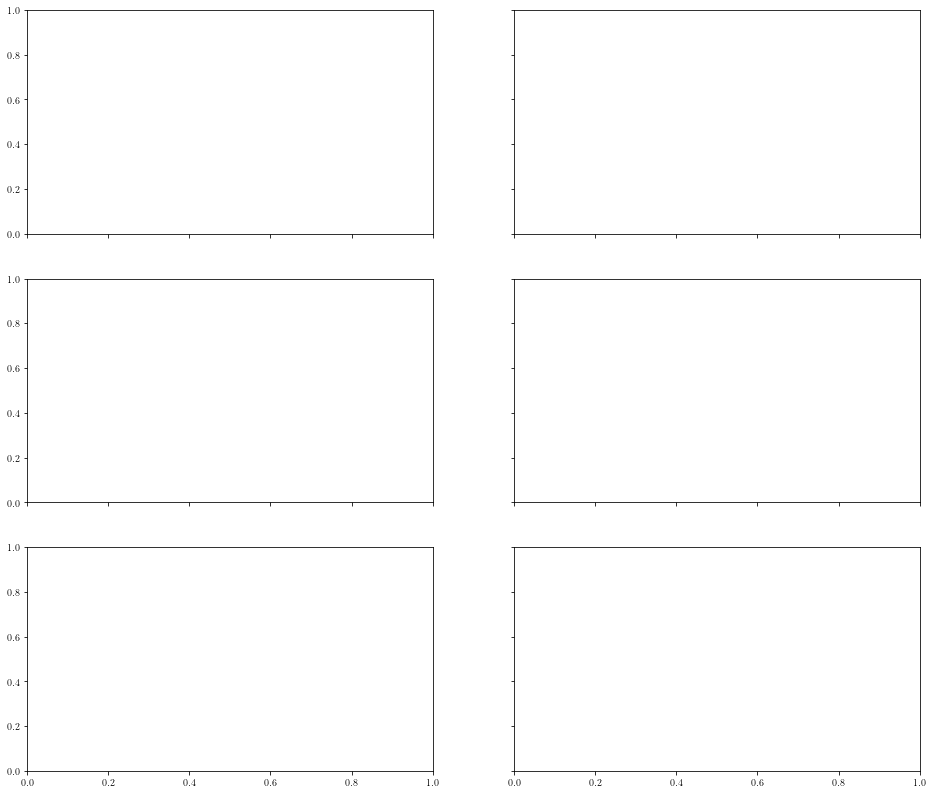

In [10]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
rc('text', usetex=True)
import dill
import numpy as np
import scipy as sp
# plt.rc('font', family='serif')
import pickle as pk

fig, ax = plt.subplots(3,2,sharex=True,sharey='row')
fig.set_size_inches((16,14))  
titles = ['Truncated','Untruncated']
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/y3-3x2pt-methods/cosmosis/bf_new/'
for jf in range(3):
    r_0 = dill.load(open(ldir + fr0_all[jf],'rb'))
    ax[jf,0].plot(np.arange(len(r_0.weights)), r_0.weights, ls='',marker='.',color='k',ms=2.0)
    ax[jf,1].plot(np.arange(len(r_0.weights_trunc)), r_0.weights_trunc, ls='',marker='.',color='k',ms=2.0)

    for j in range(2):
        ax[jf,j].set_yscale('log')
        ax[jf,j].set_xlim(0.0,3000)
        ax[jf,j].set_ylim(1e-8,1e3)
#         ax[jf,j].text()
        # ax.axhline(1.0,ls='--',color='k',alpha=1.0,lw=2.0)
#         ax[jf,j].set_ylabel(titles[j],size=22)
    #     ax[j].set_xlabel('Element Number',size=22)
        ax[jf,j].tick_params(axis='both', which='major', labelsize=18)
        ax[jf,j].tick_params(axis='both', which='minor', labelsize=18)
        ax[jf,0].text( 0.1, 0.96,text[jf], verticalalignment='top', horizontalalignment='left', transform=ax[jf,0].transAxes,
                      fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[jf,0].text(x=0.1, y=0.96,s=text[jf])    

            
#     ax[j].set_title(titles[j],size=22)
# ax.legend(fontsize=18)







In [ ]:
from mcfit import SphericalBessel as sph



In [ ]:
from mcfit import xi2P

def takefft(M,c,rho_crit, Dv=200):
    r_array = np.logspace(-3,1,200)
    rv = (M/(4*np.pi/3.))**(1./3.)
    rs = rv/c
    rho_s = (M/(4.*np.pi*rs**3))*(np.log(1. + c) - c/(1.+c))
    rho_rm = rho_s*((r/rs)**-1)*((1. + (r/rs))**-3)
    ind_gtrv = np.where(r_array > rv)[0]
    u_rm[ind_gtrv] = 0.
    ell_array = np.arange(6)
    ulkm_all = []
    for ell in ell_array:
        k, ulkm = xi2P(r, l=ell)(u_rm)
        ulkm_all.append(ulkm)
        
    


In [36]:
knl = np.logspace(-5,2,1000)
kmean = 1.0
Pk = 1/knl**4

r_array, xitemp = sph(knl, nu=0, q=1.5)(Pk * np.sqrt(np.pi / 2.), extrap=True)  
xi_basis = (1 / (2 * np.pi ** 2)) * xitemp






In [39]:
_,Pk_back = sph(r_array, nu=0, q=2.5)(xi_basis * np.sqrt(np.pi / 2.), extrap=True)  



In [2]:
dfv = np.loadtxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/untrimmed_sky_positions_central_Redmagic_highdens_y3a2_v0.5.1.out')    




In [4]:
rv = dfv[:,3]


(array([1.379e+03, 1.752e+03, 1.932e+03, 1.936e+03, 1.584e+03, 1.337e+03,
        9.430e+02, 6.890e+02, 5.020e+02, 3.100e+02, 2.330e+02, 9.700e+01,
        8.400e+01, 3.400e+01, 1.600e+01, 7.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([10.08  , 12.5215, 14.963 , 17.4045, 19.846 , 22.2875, 24.729 ,
        27.1705, 29.612 , 32.0535, 34.495 , 36.9365, 39.378 , 41.8195,
        44.261 , 46.7025, 49.144 , 51.5855, 54.027 , 56.4685, 58.91  ]),
 <a list of 20 Patch objects>)

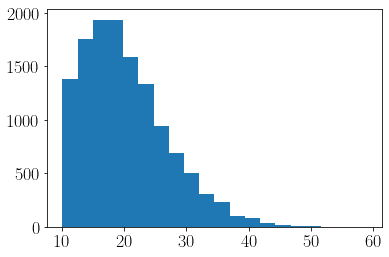

In [7]:
pl.hist(rv, bins=20)


(array([  76.,  100.,  157.,  157.,  290.,  386.,  334.,  375.,  523.,
         577.,  564.,  782.,  929.,  995.,  970.,  945., 1087., 1251.,
        1342., 1001.]),
 array([0.18008 , 0.201833, 0.223586, 0.245339, 0.267092, 0.288845,
        0.310598, 0.332351, 0.354104, 0.375857, 0.39761 , 0.419363,
        0.441116, 0.462869, 0.484622, 0.506375, 0.528128, 0.549881,
        0.571634, 0.593387, 0.61514 ]),
 <a list of 20 Patch objects>)

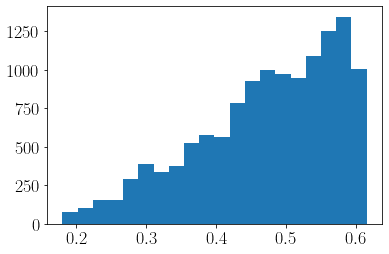

In [8]:
pl.hist(dfv[:,2], bins=20)